# Intro

** **

# Table of Contents

<a class="anchor" id="top"></a>

** **


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data) <br><br>
    
2. [Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)

    2.1 [Initial Exploration](#2.1-Initial-Exploration)

    2.2 [Incoherencies](#2.2-Incoherencies)
    
    2.3 [Initial Visualisations](#2.3-Initial-Visualisations) <br><br>
    
3. [Data Cleaning & Preprocessing](#3.-Data-Cleaning-&-Preprocessing)


    3.1 [Duplicates](#3.1-Duplicates)
    
    3.2 [Train-Test Split](#3.2-Train-Test-Split)
    
    3.3 [Missing Values](#3.3-Missing-Values)
    
    &emsp; 3.3.1 [Data Type Conversions](#3.3.1-Data-Type-Conversions)
    
    &emsp; 3.3.2 [Missing Values Identification & Treatment](#3.3.2-Missing-Values-Identification-&-Treatment)

    &emsp; 3.3.3 [Unique Feature-Pair Analysis](#3.3.3-Unique-Feature-Pair-Analysis) 
    
    3.4 [Outliers](#3.4-Outliers)
    
    3.5 [Feature Engineering](#3.5-Feature-Engineering) 

    3.6 [Visualisations](#3.6-Visualisations) <br><br>
    
4. [Feature Selection](#4.-Feature-Selection)    <br><br>     
    
5. [Export](#5.-Export)


In [75]:
## notebook 1 - preprocessing + EDA
## notebook 2 - modelos



# 1. Importing Libraries & Data

<a href="#top">Top &#129033;</a>

In [3]:
import pandas as pd
import numpy as np


# profile report
#from ydata_profiling import ProfileReport

# visualisations
import seaborn as sns
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# external functions file
import functions as f


pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('./project_data/train_data.csv', index_col = 'Claim Identifier')
df.head(3)

/var/folders/mm/fxsq_1490x9dd2w76tqvt3kr0000gn/T/ipykernel_7768/3163598516.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./project_data/train_data.csv', index_col = 'Claim Identifier')


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0


In [3]:
test = pd.read_csv('./project_data/test_data.csv', index_col = 'Claim Identifier')
test.head(3)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,BRONX,N,NYC,NaN,M,NaN,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
6166141,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,1A. PRIVATE,QUEENS,N,NYC,NaN,F,NaN,45.0,RETAIL TRADE,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1
6165907,2022-12-26,59,N,2023-01-02,N,0.0,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,1A. PRIVATE,WESTCHESTER,N,NYC,NaN,F,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,III,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0


# 2. Exploratory Data Analysis

<a href="#top">Top &#129033;</a>

## 2.1 Initial Exploration

In [3]:
# profile = ProfileReport(
#     df, 
#     title='Data',
#     correlations={
#         "pearson": {"calculate": True},
#         "spearman": {"calculate": False},
#         "kendall": {"calculate": False},
#         "phi_k": {"calculate": False},
#         "cramers": {"calculate": False},
#     },
# )

# profile

In [4]:
df.describe(include='object').T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,593471,1096,2020-03-06,1422
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,42.114270,14.256432,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,491.088321,6092.918120,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1886.767604,414.644423,0.0,1965.0,1977.0,1989.0,2018.0
IME-4 Count,132803.0,3.207337,2.832303,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,58.645305,19.644175,11.0,45.0,61.0,71.0,92.0
OIICS Nature of Injury Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Cause of Injury Code,558386.0,54.381143,25.874281,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,41.013839,22.207521,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,39.738146,22.365940,-9.0,33.0,38.0,53.0,99.0
Agreement Reached,574026.0,0.046665,0.210921,0.0,0.0,0.0,0.0,1.0


In [6]:
df.shape

(593471, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

**Correlation matrix**

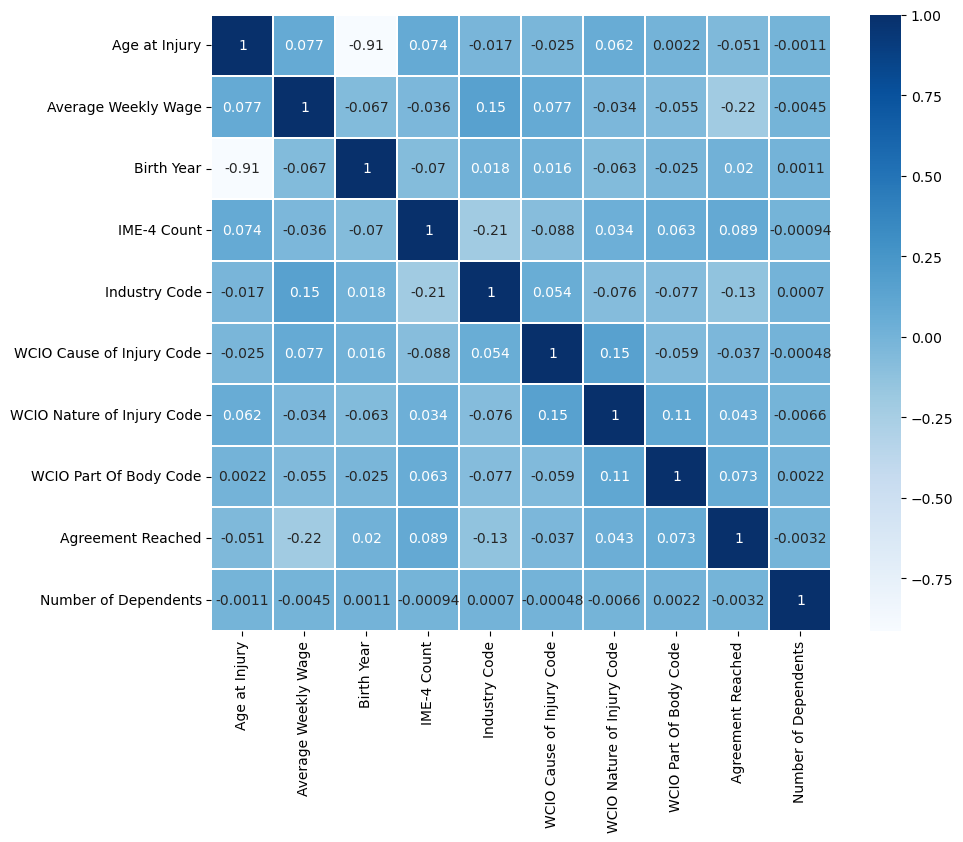

In [8]:
# drop column always missing
temp = df.drop('OIICS Nature of Injury Description', axis = 1)

# drop na
temp = temp.dropna()

# select numbers
corr_data = temp.select_dtypes(include=['number'])

correlation_matrix = corr_data.corr(method='spearman') # pearson by default

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.1)
plt.show()

**Unique Values**

In [9]:
for column in df.columns:
    
    if df[column].nunique() < 20:
        
        print(f"Unique values in '{column}': {df[column].unique()}")
        print(df[column].nunique(), '\n')

Unique values in 'Alternative Dispute Resolution': ['N' nan 'Y' 'U']
3 

Unique values in 'Attorney/Representative': ['N' 'Y' nan]
2 

Unique values in 'Carrier Type': ['1A. PRIVATE' nan '2A. SIF' '4A. SELF PRIVATE' '3A. SELF PUBLIC'
 'UNKNOWN' '5D. SPECIAL FUND - UNKNOWN'
 '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)'
 '5C. SPECIAL FUND - POI CARRIER WCB MENANDS']
8 

Unique values in 'Claim Injury Type': ['2. NON-COMP' '4. TEMPORARY' nan '3. MED ONLY' '5. PPD SCH LOSS'
 '6. PPD NSL' '1. CANCELLED' '8. DEATH' '7. PTD']
8 

Unique values in 'COVID-19 Indicator': ['N' nan 'Y']
2 

Unique values in 'District Name': ['SYRACUSE' 'ROCHESTER' 'ALBANY' nan 'HAUPPAUGE' 'NYC' 'BUFFALO'
 'BINGHAMTON' 'STATEWIDE']
8 

Unique values in 'Gender': ['M' 'F' nan 'U' 'X']
4 

Unique values in 'Medical Fee Region': ['I' 'II' nan 'IV' 'UK' 'III']
5 

Unique values in 'OIICS Nature of Injury Description': [nan]
0 

Unique values in 'Agreement Reached': [ 0.  1. nan]
2 

Unique values in 'WCB Decision': ['

## 2.2 Incoherencies

<a href="#top">Top &#129033;</a>

**Age at Injury**

very high max values

In [10]:
df[df['Age at Injury'] > 100]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5415899,2020-01-24,102.0,N,2020-01-30,N,0.0,1917.0,2020-01-30,NaN,NORTH SYRACUSE CSD,3A. SELF PUBLIC,2. NON-COMP,ONONDAGA,N,SYRACUSE,NaN,F,NaN,61.0,EDUCATIONAL SERVICES,I,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",40.0,LACERATION,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,13031,0.0,Not Work Related,2.0
5424769,2018-08-26,117.0,N,2020-02-10,N,0.0,1901.0,2020-02-10,NaN,AMTRUST INS CO OF KANSAS INC,1A. PRIVATE,2. NON-COMP,KINGS,N,NYC,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),59.0,"ALL OTHER SPECIFIC INJURIES, NOC",65.0,INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...,11218,0.0,Not Work Related,5.0
5432944,2020-02-17,113.0,N,2020-02-19,Y,692.0,1907.0,2020-02-19,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5. PPD SCH LOSS,NIAGARA,N,BUFFALO,NaN,F,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,I,NaN,60.0,"STRAIN OR INJURY BY, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",38.0,SHOULDER(S),NaN,0.0,Not Work Related,5.0
5453673,2020-03-05,104.0,N,2020-03-16,Y,0.0,1916.0,2020-03-16,NaN,ONEIDA COUNTY SELF INS PLAN,3A. SELF PUBLIC,2. NON-COMP,HERKIMER,N,SYRACUSE,NaN,M,NaN,92.0,PUBLIC ADMINISTRATION,II,NaN,56.0,LIFTING,10.0,CONTUSION,52.0,UPPER LEG,13502,0.0,Not Work Related,3.0
5459129,2018-03-22,117.0,N,2020-03-27,N,0.0,1901.0,2020-03-27,NaN,AMTRUST INS CO OF KANSAS INC,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,33.0,MANUFACTURING,IV,NaN,82.0,"ABSORPTION, INGESTION OR INHALATION, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",65.0,INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...,11703,0.0,Not Work Related,2.0
5546365,2016-11-01,115.0,N,2020-08-28,N,0.0,0.0,2020-08-28,NaN,WESCO INSURANCE CO,1A. PRIVATE,1. CANCELLED,ERIE,N,BUFFALO,2020-12-03,F,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,I,NaN,15.0,BROKEN GLASS,40.0,LACERATION,34.0,WRIST,14140,0.0,Not Work Related,5.0
5559268,2020-09-11,110.0,N,2020-09-15,N,0.0,1910.0,2020-09-15,NaN,SAFETY NATIONAL CASUALTY CORP,1A. PRIVATE,2. NON-COMP,ORANGE,N,ALBANY,NaN,F,NaN,45.0,RETAIL TRADE,III,NaN,27.0,FROM LIQUID OR GREASE SPILLS,52.0,STRAIN OR TEAR,53.0,KNEE,10940,0.0,Not Work Related,1.0
5706270,2021-04-21,110.0,N,2021-04-23,N,0.0,1911.0,2021-04-23,NaN,WESCO INSURANCE COMPANY,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,III,NaN,68.0,STATIONARY OBJECT,40.0,LACERATION,18.0,SOFT TISSUE,11946,0.0,Not Work Related,5.0
5804529,2021-07-02,101.0,N,2021-09-03,N,0.0,1920.0,2021-09-03,NaN,CAROLINA CASUALTY INS CO,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaN,F,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",10.0,CONTUSION,35.0,HAND,11763,0.0,Not Work Related,0.0


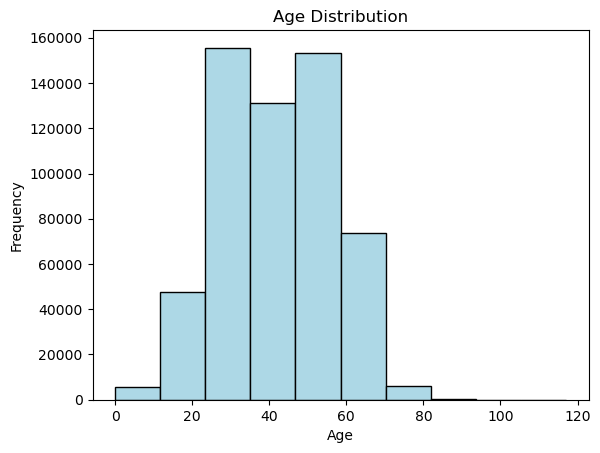

In [11]:
f.plot_histogram(df['Age at Injury'], 'Age', 'Frequency',
                'Age Distribution')

In [12]:
# # age 0 at injury while being born a long time before the accident
# df[(df['Age at Injury'] == 0) & (df['Birth Year'] != df['Accident Date'])]

**Birth Year**

very Low values for Birth Year, but a LOT of rows with the same issue

In [13]:
df[df['Birth Year'] < 1800]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5394187,2019-12-14,21.0,N,2020-01-01,N,0.0,0.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,M,NaN,51.0,INFORMATION,UK,NaN,75.0,FALLING OR FLYING OBJECT,37.0,INFLAMMATION,53.0,KNEE,07649,0.0,Not Work Related,3.0
5394053,2019-12-18,53.0,N,2020-01-01,N,0.0,0.0,2020-01-01,NaN,TWIN CITY FIRE INS CO.,1A. PRIVATE,2. NON-COMP,WARREN,N,ALBANY,NaN,F,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,I,NaN,5.0,STEAM OR HOT FLUIDS,4.0,BURN,56.0,FOOT,12810,0.0,Not Work Related,4.0
5393827,2019-12-26,21.0,N,2020-01-01,N,0.0,0.0,2020-01-01,NaN,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,III,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",40.0,LACERATION,36.0,FINGER(S),11941,0.0,Not Work Related,3.0
5393885,2019-12-12,57.0,N,2020-01-01,N,0.0,0.0,2019-12-31,NaN,NATIONAL CASUALTY CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,I,NaN,32.0,ON ICE OR SNOW,28.0,FRACTURE,44.0,CHEST,13646,0.0,Not Work Related,2.0
5394008,2019-12-17,42.0,N,2020-01-01,N,0.0,0.0,2019-12-31,2020-04-16,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,F,NaN,51.0,INFORMATION,UK,NaN,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,38.0,SHOULDER(S),NaN,0.0,Not Work Related,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164729,2022-11-30,44.0,N,2022-12-30,Y,0.0,0.0,2023-01-30,2022-12-27,*** CARRIER UNDETERMINED ***,UNKNOWN,2. NON-COMP,BRONX,N,STATEWIDE,2023-05-19,M,NaN,NaN,NaN,UK,NaN,NaN,NaN,NaN,NaN,-9.0,MULTIPLE,44405,0.0,Not Work Related,6.0
6165113,2022-12-26,22.0,N,2022-12-30,N,0.0,0.0,2022-12-30,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,F,NaN,51.0,INFORMATION,UK,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,53.0,KNEE,94603,0.0,Not Work Related,3.0
6165672,2022-12-28,31.0,N,2022-12-30,N,0.0,0.0,2022-12-30,NaN,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,2. NON-COMP,UNKNOWN,N,NYC,NaN,M,NaN,42.0,WHOLESALE TRADE,UK,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,41.0,UPPER BACK AREA,05743,0.0,Not Work Related,1.0


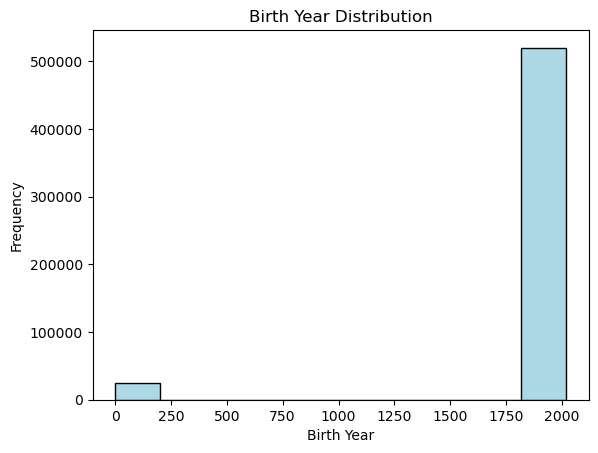

In [14]:
f.plot_histogram(df['Birth Year'], 'Birth Year', 'Frequency',
                'Birth Year Distribution')

**IME-4 Count**

Very High 

In [15]:
df[df['IME-4 Count'] > 30]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5395531,2019-12-26,51.0,N,2020-01-03,Y,1205.08,1968.0,2020-01-03,2020-01-17,A I U INSURANCE COMPANY,1A. PRIVATE,4. TEMPORARY,QUEENS,N,NYC,2020-09-30,M,36.0,42.0,WHOLESALE TRADE,IV,NaN,75.0,FALLING OR FLYING OBJECT,52.0,STRAIN OR TEAR,21.0,VERTEBRAE,11434,0.0,Not Work Related,4.0
5424849,2019-12-09,56.0,N,2020-02-11,Y,250.00,1963.0,2020-02-21,2020-01-30,NEW YORK BLACK CAR OPERATORS',4A. SELF PRIVATE,4. TEMPORARY,SUFFOLK,N,HAUPPAUGE,2020-08-20,M,32.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,49.0,SPRAIN OR TEAR,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,11727,0.0,Not Work Related,1.0
5437678,2020-02-19,24.0,N,2020-02-25,Y,2525.55,1995.0,2020-02-25,2020-03-06,STARR INDEMNITY & LIABILITY,1A. PRIVATE,4. TEMPORARY,SUFFOLK,N,HAUPPAUGE,2020-04-29,M,39.0,23.0,CONSTRUCTION,IV,NaN,30.0,"SLIP, OR TRIP, DID NOT FALL",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,11793,0.0,Not Work Related,2.0
5447387,2020-02-29,53.0,N,2020-03-06,Y,1980.19,1966.0,2020-03-05,2020-05-07,VISITING NURSE SERVICE OF NY,4A. SELF PRIVATE,4. TEMPORARY,NEW YORK,N,NYC,2020-08-27,F,32.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,10025,0.0,Not Work Related,1.0
5448127,2020-02-19,67.0,N,2020-03-10,Y,250.00,1952.0,2020-03-17,2020-02-27,HEREFORD INSURANCE COMPANY,1A. PRIVATE,4. TEMPORARY,QUEENS,N,NYC,2020-11-27,M,47.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,90.0,MULTIPLE PHYSICAL INJURIES ONLY,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,NaN,0.0,Not Work Related,4.0
5490306,2020-03-17,37.0,N,2020-06-01,Y,1502.14,1983.0,2020-06-12,2020-05-26,LIBERTY MUTUAL FIRE INS CO,1A. PRIVATE,4. TEMPORARY,NEW YORK,N,NYC,2021-02-23,M,48.0,33.0,MANUFACTURING,UK,NaN,29.0,ON SAME LEVEL,46.0,RUPTURE,38.0,SHOULDER(S),07105,0.0,Not Work Related,0.0
5491873,2020-06-01,46.0,N,2020-06-02,Y,851.41,1974.0,2020-06-02,2020-06-09,STATE INSURANCE FUND,2A. SIF,4. TEMPORARY,NEW YORK,N,NYC,2020-11-13,F,34.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",52.0,STRAIN OR TEAR,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,10039,0.0,Not Work Related,1.0
5525046,2020-07-13,42.0,N,2020-07-27,Y,1400.00,1977.0,2020-07-27,2020-10-20,STATE INSURANCE FUND,2A. SIF,4. TEMPORARY,NASSAU,N,NYC,2020-10-26,M,36.0,23.0,CONSTRUCTION,IV,NaN,81.0,"STRUCK OR INJURED, NOC",28.0,FRACTURE,55.0,ANKLE,11590,0.0,Not Work Related,1.0
5538883,2020-07-03,52.0,N,2020-08-18,Y,2672.78,NaN,2020-09-25,2020-08-12,STARR INDEMNITY & LIABILITY,1A. PRIVATE,6. PPD NSL,BRONX,N,NYC,2021-01-04,M,34.0,54.0,"PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES",IV,NaN,75.0,FALLING OR FLYING OBJECT,52.0,STRAIN OR TEAR,20.0,MULTIPLE NECK INJURY,10460,0.0,Not Work Related,3.0


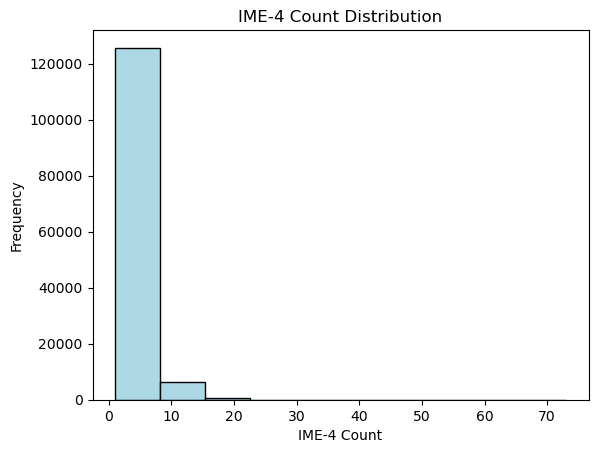

In [16]:
f.plot_histogram(df['IME-4 Count'], 'IME-4 Count', 'Frequency',
                'IME-4 Count Distribution')

**OIICS Nature of Injury Description**

always missing

In [17]:
print(f"Number of missing rows in variable OIICS Nature of Injury Description: {len(df[df['OIICS Nature of Injury Description'].isna()])}")
print(f"Number of Rows in the Dataset: {len(df)}")

Number of missing rows in variable OIICS Nature of Injury Description: 593471
Number of Rows in the Dataset: 593471


**Agreement Reached**

w/ a lot of zeros

In [18]:
df['Agreement Reached'].value_counts()

Agreement Reached
0.0    547239
1.0     26787
Name: count, dtype: int64

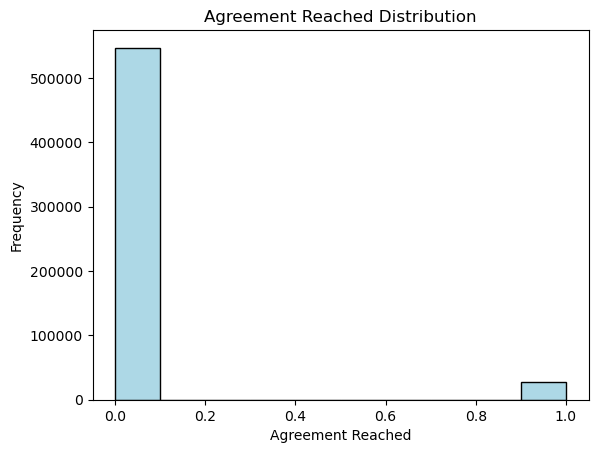

In [19]:
f.plot_histogram(df['Agreement Reached'], 'Agreement Reached', 'Frequency',
                'Agreement Reached Distribution')

**WCB Decision**

always the same

In [20]:
df['WCB Decision'].unique()

array(['Not Work Related', nan], dtype=object)

**Claim Injury Type**

imbalanced target 

In [21]:
df['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

**Incoherent Columns**

Some columns exist in train data but not on test

In [8]:
train_columns = set(df.columns)
test_columns = set(test.columns)

not_in_train = train_columns - test_columns
print(f'Columns in train but not in test: {not_in_train}')


Columns in train but not in test: {'WCB Decision', 'Claim Injury Type', 'Agreement Reached'}


## 2.3 Initial Visualisations

<a href="#top">Top &#129033;</a>

# 3. Data Cleaning & Preprocessing

<a href="#top">Top &#129033;</a>

## 3.1 Duplicates

<a href="#top">Top &#129033;</a>

In [22]:
df[df.duplicated()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
363651794,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209507552,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970865999,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807753247,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395971406,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365870975,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327160035,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249875936,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
len(df[df.duplicated()])

18350

In [24]:
len(df[df.duplicated()]) / len(df) * 100

3.091979220551636

In [25]:
df = df.drop_duplicates()

verify the success

In [26]:
df[df.duplicated()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [27]:
df[df.isna().sum(axis=1) >= 25]

# target ta missing

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
653337074,NaN,NaN,NaN,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489154817,NaN,NaN,NaN,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351928125,NaN,NaN,NaN,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454184427,NaN,NaN,NaN,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894683610,NaN,NaN,NaN,2022-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
820269517,NaN,NaN,NaN,2022-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
815542773,NaN,NaN,NaN,2022-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


dropping them

In [28]:
df = df[df.isna().sum(axis=1) < 25]

## 3.2 Train-Test Split

<a href="#top">Top &#129033;</a>

In [29]:
X = df.drop('Claim Injury Type', axis = 1)

y = df['Claim Injury Type']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify = y, 
                                                    random_state = 1)

In some cases (e.g., when applying cross-validation or using sophisticated imputation methods), it might be better to fit the imputation on the training set only and then apply the same transformation to the test set. But even then, the strategy is first determined on the training data to avoid leakage.

## 3.3 Missing Values

<a href="#top">Top &#129033;</a>

### 3.3.1 Data Type Conversions

even though this is usually feature engineering, it will be useful doing before treating missing values

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459220 entries, 6054143 to 5626711
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       456242 non-null  object 
 1   Age at Injury                       459220 non-null  float64
 2   Alternative Dispute Resolution      459220 non-null  object 
 3   Assembly Date                       459220 non-null  object 
 4   Attorney/Representative             459220 non-null  object 
 5   Average Weekly Wage                 436350 non-null  float64
 6   Birth Year                          435977 non-null  float64
 7   C-2 Date                            447610 non-null  object 
 8   C-3 Date                            149765 non-null  object 
 9   Carrier Name                        459220 non-null  object 
 10  Carrier Type                        459220 non-null  object 
 11  County of Injury        

In [32]:
X_train['Accident Date'] = pd.to_datetime(X_train['Accident Date'], 
                                     errors='coerce')

X_train['Assembly Date'] = pd.to_datetime(X_train['Assembly Date'], 
                                     errors='coerce')

X_train['C-2 Date'] = pd.to_datetime(X_train['C-2 Date'], 
                                errors='coerce')

X_train['C-3 Date'] = pd.to_datetime(X_train['C-3 Date'], 
                                errors='coerce')

X_train['First Hearing Date'] = pd.to_datetime(X_train['First Hearing Date'], 
                                          errors='coerce')

### 3.3.2 Missing Values Identification & Treatment

look for missing values

In [33]:
X_train.isna().sum()

Accident Date                           2978
Age at Injury                              0
Alternative Dispute Resolution             0
Assembly Date                              0
Attorney/Representative                    0
Average Weekly Wage                    22870
Birth Year                             23243
C-2 Date                               11610
C-3 Date                              309455
Carrier Name                               0
Carrier Type                               0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                    338497
Gender                                     0
IME-4 Count                           353037
Industry Code                           7992
Industry Code Description               7992
Medical Fee Region                         0
OIICS Nature of Injury Description    459220
WCIO Cause of Injury Code              12475
WCIO Cause

In [34]:
# missing_values_per_column = X_train.isna().sum()


# f.plot_missing_values_bar(
#     data=missing_values_per_column,
#     xlabel='Columns',
#     ylabel='Number of Missing Values',
#     title='Missing Values per Column'
# )


same but in percentage

In [35]:
X_train.isna().sum() / len(df) * 100

Accident Date                          0.518793
Age at Injury                          0.000000
Alternative Dispute Resolution         0.000000
Assembly Date                          0.000000
Attorney/Representative                0.000000
Average Weekly Wage                    3.984147
Birth Year                             4.049127
C-2 Date                               2.022560
C-3 Date                              53.909673
Carrier Name                           0.000000
Carrier Type                           0.000000
County of Injury                       0.000000
COVID-19 Indicator                     0.000000
District Name                          0.000000
First Hearing Date                    58.969034
Gender                                 0.000000
IME-4 Count                           61.502025
Industry Code                          1.392274
Industry Code Description              1.392274
Medical Fee Region                     0.000000
OIICS Nature of Injury Description    80

look case by case --> focus on high % of missing first

**C-3 Date**

In [36]:
print(f'There are {len(X_train[X_train["C-3 Date"].isna()])} rows with missing values')
X_train[X_train['C-3 Date'].isna()].head(2)

# var description: Date Form C-3 (Employee Claim Form) was received
## interpretation --> if missing, was not received --> fill w/ 0 ou deixar estar como está (?) --> pode dar problema nas visualisations

There are 309455 rows with missing values


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6054143,2022-07-28,49.0,N,2022-08-04,N,405.0,1973.0,2022-08-04,NaT,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,DUTCHESS,N,ALBANY,NaT,F,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,II,NaN,27.0,FROM LIQUID OR GREASE SPILLS,52.0,STRAIN OR TEAR,33.0,LOWER ARM,12590,0.0,Not Work Related,5.0
5405551,2020-01-06,30.0,N,2020-01-16,N,0.0,1989.0,2020-01-16,NaT,MEMIC CASUALTY COMPANY,1A. PRIVATE,ONONDAGA,N,SYRACUSE,NaT,F,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,13204,0.0,Not Work Related,0.0


In [37]:
# Create a binary variable: 1 if 'C-3 Date' is not missing, 0 if it is missing
X_train['C-3 Date Binary'] = X_train['C-3 Date'].notna().astype(int)

**First Hearing Date**

In [38]:
print(f'There are {len(X_train[X_train["First Hearing Date"].isna()])} rows with missing values')
X_train[X_train['First Hearing Date'].isna()].head(2)

# var meaning --> Date the first hearing was held on a claim at a WCB hearinglocation. A blank date means the claim has not yet had ahearing held
## sol --> fill w/ 0s ou deixar estar como está (?) --> pode dar problema nas visualisations

There are 338497 rows with missing values


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6054143,2022-07-28,49.0,N,2022-08-04,N,405.0,1973.0,2022-08-04,NaT,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,DUTCHESS,N,ALBANY,NaT,F,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,II,NaN,27.0,FROM LIQUID OR GREASE SPILLS,52.0,STRAIN OR TEAR,33.0,LOWER ARM,12590,0.0,Not Work Related,5.0,0
5405551,2020-01-06,30.0,N,2020-01-16,N,0.0,1989.0,2020-01-16,NaT,MEMIC CASUALTY COMPANY,1A. PRIVATE,ONONDAGA,N,SYRACUSE,NaT,F,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,13204,0.0,Not Work Related,0.0,0


In [39]:
# Create a new variable: 0 if 'First Hearing Date' is missing, otherwise extract the year

X_train['First Hearing Year'] = X_train['First Hearing Date'].apply(lambda x: x.year if pd.notna(x) else 0)

### other alternative
## 1->first hearing aconteceu
## o --> not happened

**IME-4 Count**

In [40]:
print(f'There are {len(X_train[X_train["IME-4 Count"].isna()])} rows with missing values')
X_train[X_train['IME-4 Count'].isna()].head(2)

# var description -->Number of IME-4 forms received per claim. The IME-4 form isthe “Independent Examiner's Report of Independent MedicalExamination” form
## ASSUME that if missing, no forms received --> fill w/ zero

There are 353037 rows with missing values


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6054143,2022-07-28,49.0,N,2022-08-04,N,405.0,1973.0,2022-08-04,NaT,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,DUTCHESS,N,ALBANY,NaT,F,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,II,NaN,27.0,FROM LIQUID OR GREASE SPILLS,52.0,STRAIN OR TEAR,33.0,LOWER ARM,12590,0.0,Not Work Related,5.0,0,0
5405551,2020-01-06,30.0,N,2020-01-16,N,0.0,1989.0,2020-01-16,NaT,MEMIC CASUALTY COMPANY,1A. PRIVATE,ONONDAGA,N,SYRACUSE,NaT,F,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,13204,0.0,Not Work Related,0.0,0,0


In [41]:
X_train['IME-4 Count'] = X_train['IME-4 Count'].fillna(0)

**OIICS Nature of Injury Description**

In [42]:
print(f'There are {len(X_train[X_train["OIICS Nature of Injury Description"].isna()])} rows with missing values')
X_train[X_train['OIICS Nature of Injury Description'].isna()].head(2)

There are 459220 rows with missing values


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6054143,2022-07-28,49.0,N,2022-08-04,N,405.0,1973.0,2022-08-04,NaT,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,DUTCHESS,N,ALBANY,NaT,F,0.0,72.0,ACCOMMODATION AND FOOD SERVICES,II,NaN,27.0,FROM LIQUID OR GREASE SPILLS,52.0,STRAIN OR TEAR,33.0,LOWER ARM,12590,0.0,Not Work Related,5.0,0,0
5405551,2020-01-06,30.0,N,2020-01-16,N,0.0,1989.0,2020-01-16,NaT,MEMIC CASUALTY COMPANY,1A. PRIVATE,ONONDAGA,N,SYRACUSE,NaT,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,13204,0.0,Not Work Related,0.0,0,0


In [43]:
# size of missing / size of dataset
len(X_train[X_train['OIICS Nature of Injury Description'].isna()]) / len(X_train)

1.0

drop useless variables 

In [44]:
X_train = X_train.drop(['C-3 Date', 'First Hearing Date', 
             'OIICS Nature of Injury Description'], axis = 1)

verify success of the task

In [45]:
X_train.isna().sum() / len(df) * 100

Accident Date                        0.518793
Age at Injury                        0.000000
Alternative Dispute Resolution       0.000000
Assembly Date                        0.000000
Attorney/Representative              0.000000
Average Weekly Wage                  3.984147
Birth Year                           4.049127
C-2 Date                             2.022560
Carrier Name                         0.000000
Carrier Type                         0.000000
County of Injury                     0.000000
COVID-19 Indicator                   0.000000
District Name                        0.000000
Gender                               0.000000
IME-4 Count                          0.000000
Industry Code                        1.392274
Industry Code Description            1.392274
Medical Fee Region                   0.000000
WCIO Cause of Injury Code            2.173250
WCIO Cause of Injury Description     2.173250
WCIO Nature of Injury Code           2.175863
WCIO Nature of Injury Description 

look at the rest that are missing

**Accident Date**

In [46]:
# always has age at injury 0
X_train[X_train['Accident Date'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5928186,NaT,0.0,N,2022-02-23,Y,0.00,1958.0,2024-05-09,NYC TRANSIT AUTHORITY,3A. SELF PUBLIC,KINGS,N,NYC,M,0.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,99.0,"OTHER - MISCELLANEOUS, NOC",31.0,HEARING LOSS OR IMPAIRMENT,13.0,EAR(S),11203,0.0,Not Work Related,0.0,1,0
5454576,NaT,0.0,N,2020-03-18,Y,0.00,1972.0,2021-03-20,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,KINGS,N,NYC,M,0.0,92.0,PUBLIC ADMINISTRATION,IV,97.0,REPETITIVE MOTION,78.0,CARPAL TUNNEL SYNDROME,34.0,WRIST,11211,0.0,Not Work Related,3.0,1,2021
5506875,NaT,0.0,N,2020-06-29,Y,0.00,1980.0,2020-07-01,SAFETY NATIONAL CASUALTY CORP,1A. PRIVATE,NEW YORK,N,NYC,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,83.0,PANDEMIC,83.0,COVID-19,60.0,LUNGS,10030,0.0,Not Work Related,3.0,1,0
5604620,NaT,0.0,N,2020-11-23,Y,0.00,0.0,NaT,STATE INSURANCE FUND,2A. SIF,BRONX,N,NYC,M,0.0,NaN,NaN,UK,NaN,NaN,NaN,NaN,NaN,NaN,44515,0.0,Not Work Related,4.0,1,0
6151531,NaT,0.0,N,2022-12-12,Y,569.05,1976.0,2022-12-28,HIGHVIEW NATIONAL INSURANCE,1A. PRIVATE,BRONX,N,NYC,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,38.0,SHOULDER(S),10469,0.0,Not Work Related,3.0,1,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095127,NaT,0.0,N,2022-09-28,Y,0.00,1956.0,2022-10-07,SENTRY INSURANCE A MUTUAL CO,1A. PRIVATE,ERIE,N,BUFFALO,M,0.0,51.0,INFORMATION,II,52.0,CONTINUAL NOISE,72.0,LOSS OF HEARING,13.0,EAR(S),14210,0.0,Not Work Related,6.0,1,0
5514850,NaT,0.0,N,2020-07-13,Y,0.00,1974.0,NaT,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,QUEENS,N,NYC,F,0.0,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,11434,0.0,Not Work Related,6.0,1,0
6042832,NaT,0.0,N,2022-07-25,Y,0.00,1980.0,NaT,SAFETY NATIONAL CASUALTY CORP,1A. PRIVATE,NASSAU,N,NYC,M,0.0,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,11580,0.0,Not Work Related,4.0,1,2023


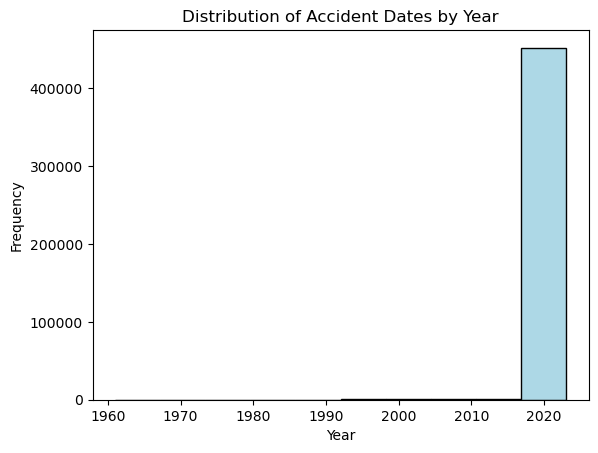

In [47]:
years = X_train['Accident Date'].dt.year.dropna() 

f.plot_histogram(data=years, 
               xlabel='Year', 
               ylabel='Frequency', 
               title='Distribution of Accident Dates by Year')

Use the Median Difference Between the Two Dates

In [48]:
# Calculate the median difference between 'Assembly Date' and 'Accident Date'
time_diff = (X_train['Assembly Date'] - X_train['Accident Date']).median()


In [49]:
X_train['Accident Date'] = X_train['Accident Date'].fillna(X_train['Assembly Date'] - time_diff)

**Average Weekly Wage**

In [50]:
X_train[X_train['Average Weekly Wage'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6132470,2022-11-12,20.0,N,2022-11-14,N,NaN,2002.0,2022-11-14,INDEMNITY INSURANCE CO OF,1A. PRIVATE,QUEENS,N,NYC,F,0.0,44.0,RETAIL TRADE,IV,56.0,LIFTING,52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,11694,0.0,Not Work Related,5.0,0,0
5947816,2022-02-25,57.0,N,2022-03-21,N,NaN,1964.0,2022-03-21,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,ONONDAGA,N,SYRACUSE,M,0.0,33.0,MANUFACTURING,I,57.0,PUSHING OR PULLING,59.0,"ALL OTHER SPECIFIC INJURIES, NOC",-9.0,MULTIPLE,13027,0.0,Not Work Related,1.0,0,0
5855490,2021-10-21,30.0,N,2021-11-11,Y,NaN,1991.0,2021-11-10,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,BRONX,N,NYC,M,1.0,92.0,PUBLIC ADMINISTRATION,IV,31.0,"FALL, SLIP OR TRIP, NOC",16.0,DISLOCATION,53.0,KNEE,10472,0.0,Not Work Related,2.0,1,2022
5899322,2022-01-10,41.0,N,2022-01-14,N,NaN,1980.0,2022-01-14,SOMPO AMERICA FIRE & MARINE,1A. PRIVATE,SUFFOLK,N,HAUPPAUGE,M,0.0,72.0,ACCOMMODATION AND FOOD SERVICES,IV,87.0,FOREIGN MATTER (BODY) IN EYE(S),4.0,BURN,14.0,EYE(S),11706,0.0,Not Work Related,4.0,0,0
5837796,2021-09-15,63.0,N,2021-10-20,N,NaN,1958.0,2021-10-20,STATE INSURANCE FUND,2A. SIF,QUEENS,N,NYC,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,60.0,"STRAIN OR INJURY BY, NOC",52.0,STRAIN OR TEAR,40.0,MULTIPLE TRUNK,11377,0.0,Not Work Related,5.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5997903,2022-05-14,33.0,N,2022-05-24,N,NaN,1988.0,2022-05-24,MILFORD CASUALTY INSURANCE CO,1A. PRIVATE,WESTCHESTER,N,NYC,M,0.0,23.0,CONSTRUCTION,III,16.0,"HAND TOOL, UTENSIL; NOT POWERED",40.0,LACERATION,37.0,THUMB,10550,0.0,Not Work Related,0.0,0,0
6109762,2022-10-06,61.0,N,2022-10-17,Y,NaN,1960.0,2022-10-17,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,ERIE,N,BUFFALO,F,1.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,56.0,LIFTING,49.0,SPRAIN OR TEAR,42.0,LOWER BACK AREA,14208,0.0,Not Work Related,0.0,1,2023
5945377,2022-03-10,24.0,N,2022-03-16,N,NaN,1997.0,2022-03-16,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,WESTCHESTER,N,NYC,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,III,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",10.0,CONTUSION,32.0,ELBOW,10701,0.0,Not Work Related,2.0,0,0


KNN - Imputation

In [55]:
from sklearn.impute import KNNImputer

num = X_train.select_dtypes(include=[float, int]).columns

imputer = KNNImputer(n_neighbors=5)

X_train[num] = imputer.fit_transform(X_train[num])

KeyboardInterrupt: 

In [58]:
X_train[X_train['Average Weekly Wage'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


**Birth Year**

can be computed from Age at Injury & accident date

In [59]:
X_train[X_train['Birth Year'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [60]:
X_train.loc[df['Birth Year'].isna(), 
       'Birth Year'] = X_train['Accident Date'].dt.year - X_train['Age at Injury']


**C-2 Date**

In [61]:
X_train[X_train['C-2 Date'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5436120,2020-02-24,29.0,N,2020-02-24,N,0.000,1990.0,NaT,PFL NI CARRIER UNDETERMINED,5D. SPECIAL FUND - UNKNOWN,BRONX,N,STATEWIDE,F,0.0,67.4,NaN,IV,69.2,NaN,46.6,NaN,51.0,NaN,10466,0.0,Not Work Related,0.0,0.0,0.0
5529076,2019-06-18,20.0,N,2020-08-03,N,151.356,1998.0,NaT,INDEMNITY INSURANCE CO OF,1A. PRIVATE,LIVINGSTON,N,ROCHESTER,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,I,44.6,NaN,57.2,NaN,38.4,NaN,14472,0.0,Not Work Related,2.0,0.0,0.0
5727559,2021-05-10,41.0,N,2021-05-21,Y,0.000,1979.0,NaT,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,NASSAU,N,NYC,M,0.0,50.6,NaN,IV,61.4,NaN,26.2,NaN,38.4,NaN,11510,0.0,Not Work Related,3.0,1.0,0.0
5438162,2020-02-20,50.0,N,2020-02-25,N,0.000,1969.0,NaT,NYC TRANSIT AUTHORITY,3A. SELF PUBLIC,KINGS,N,NYC,M,0.0,48.0,TRANSPORTATION AND WAREHOUSING,UK,37.2,NaN,51.6,NaN,53.2,NaN,18360,0.0,Not Work Related,3.0,1.0,0.0
5604620,2020-11-13,0.0,N,2020-11-23,Y,0.000,0.0,NaT,STATE INSURANCE FUND,2A. SIF,BRONX,N,NYC,M,0.0,57.4,NaN,UK,84.8,NaN,42.6,NaN,17.4,NaN,44515,0.0,Not Work Related,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778641,2021-05-17,41.0,N,2021-08-02,Y,0.000,1979.0,NaT,HEALTH & HOSPITAL CORP.,3A. SELF PUBLIC,BRONX,N,NYC,F,0.0,50.6,NaN,IV,61.4,NaN,26.2,NaN,38.4,NaN,10458,0.0,Not Work Related,3.0,1.0,0.0
5740507,2021-02-18,56.0,N,2021-06-10,N,220.462,1965.0,NaT,A I U INSURANCE COMPANY,1A. PRIVATE,MONROE,N,ROCHESTER,F,0.0,44.0,RETAIL TRADE,I,55.6,NaN,32.8,NaN,47.6,NaN,14580.0,0.0,Not Work Related,4.0,0.0,0.0
5877383,2021-09-02,61.0,N,2021-12-15,N,0.000,1959.0,NaT,PENNSYLVANIA MANUFACTURERS,1A. PRIVATE,ERIE,N,BUFFALO,M,0.0,33.0,MANUFACTURING,II,61.2,NaN,36.4,NaN,46.0,NaN,14214,0.0,Not Work Related,6.0,1.0,0.0


In [69]:
#fill with median
median_c2_date = X_train['C-2 Date'].median()

X_train['C-2 Date'] = X_train['C-2 Date'].fillna(median_c2_date)

In [70]:
X_train[X_train['C-2 Date'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


**Industry Code**

In [71]:
X_train[(X_train['Industry Code'].isna()) & (X_train['Industry Code Description'].isna())]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [72]:
X_train['Industry Code'].unique()

array([72. , 62. , 48. , 53. , 92. , 23. , 42. , 44. , 61. , 56. , 22. ,
       54. , 45. , 71. , 33.4, 33. , 49. , 32. , 52. , 81. , 67.4, 51. ,
       55. , 31. , 11. , 26.8, 48.2, 50.6, 57.4, 21. , 59.8, 65. , 65.2,
       70.2, 35.2, 68. , 60.6, 45.2, 43.2, 57.2, 46.4, 37. , 63.8, 39.6,
       63.6, 59.4, 54.2, 54.6, 67.8, 48.4, 35.8, 60.8, 64.6, 69. , 60.4,
       70.6, 51.8, 50.8, 35. , 47.4, 55.2, 76.4, 57.8, 56.4, 44.4, 58.6,
       64.4, 40.8, 46.6, 47.6, 49.2, 33.6, 63.2, 53.6, 73.8, 47.2, 61.4,
       61.6, 71.8, 63. , 50.2, 70.4, 74.8, 45.8, 64. , 56.2, 57.6, 51.2,
       50. , 54.4, 66.4, 54.8, 46.8, 59.2, 65.4, 79.8, 41. , 77.8, 49.6,
       41.6, 42.8, 58.4, 62.2, 61.2, 74.2, 56.8, 60. , 65.8, 38.6, 60.2,
       58.8, 53.4, 69.8, 47. , 41.8, 40.2, 58.2, 46. , 74. , 76. , 69.6,
       62.4, 62.8, 75.4, 43.8, 85.8, 44.8, 64.8, 52.6, 66.6, 39.2, 37.8,
       78.8, 66. , 55.6, 43.4, 31.4, 50.4, 49.8, 66.2, 77.6, 55.8, 51.6,
       57. , 65.6, 67. , 71.2, 52.2, 71.4, 61.8, 42

In [73]:
# fill with new code for unknown - 0

X_train['Industry Code'] = X_train['Industry Code'].fillna(0)
X_train['Industry Code Description'] = X_train['Industry Code Description'].fillna('Unknown')

**WCIO Cause of Injury Code**

In [74]:
X_train[(X_train['WCIO Cause of Injury Code'].isna()) & (X_train['WCIO Cause of Injury Description'].isna())]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [75]:
# fill with new code for unknown - 0

X_train['WCIO Cause of Injury Code'] = X_train['WCIO Cause of Injury Code'].fillna(0)
X_train['WCIO Cause of Injury Description'] = X_train['WCIO Cause of Injury Description'].fillna('Unknown')

**WCIO Nature of Injury Code**

In [76]:
X_train[(X_train['WCIO Nature of Injury Code'].isna()) & (X_train['WCIO Nature of Injury Description'].isna())]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [77]:
# fill with new code for unknown - 0

X_train['WCIO Nature of Injury Code'] = X_train['WCIO Nature of Injury Code'].fillna(0)
X_train['WCIO Nature of Injury Description'] = X_train['WCIO Nature of Injury Description'].fillna('Unknown')

**WCIO Part Of Body Code**

In [78]:
X_train[(X_train['WCIO Part Of Body Code'].isna()) & (X_train['WCIO Part Of Body Description'].isna())]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [79]:
# fill with new code for unknown - 0

X_train['WCIO Part Of Body Code'] = X_train['WCIO Part Of Body Code'].fillna(0)
X_train['WCIO Part Of Body Description'] = X_train['WCIO Part Of Body Description'].fillna('Unknown')

**Zip Code**

In [80]:
X_train[X_train['Zip Code'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5715735,2021-04-27,25.0,N,2021-05-05,N,0.0,1995.0,2021-05-05,GREAT NECK UNION FREE,3A. SELF PUBLIC,QUEENS,N,NYC,F,0.0,61.0,EDUCATIONAL SERVICES,IV,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",10.0,CONTUSION,33.0,LOWER ARM,NaN,0.0,Not Work Related,4.0,0.0,0.0
5483253,2020-04-05,37.0,N,2020-05-15,N,0.0,1982.0,2020-05-15,STATE INSURANCE FUND,2A. SIF,SUFFOLK,Y,HAUPPAUGE,F,0.0,61.0,EDUCATIONAL SERVICES,IV,83.0,PANDEMIC,83.0,COVID-19,60.0,LUNGS,NaN,0.0,Not Work Related,0.0,1.0,0.0
5891926,2021-12-24,59.0,N,2022-01-05,N,0.0,1962.0,2022-01-04,LM INSURANCE CORP,1A. PRIVATE,SUFFOLK,Y,HAUPPAUGE,M,0.0,49.0,TRANSPORTATION AND WAREHOUSING,IV,83.0,PANDEMIC,83.0,COVID-19,91.0,BODY SYSTEMS AND MULTIPLE BODY SYSTEMS,NaN,0.0,Not Work Related,1.0,0.0,0.0
5599255,2020-11-07,28.0,N,2020-11-13,N,0.0,1992.0,2020-11-13,STATE INSURANCE FUND,2A. SIF,ONONDAGA,N,SYRACUSE,F,0.0,92.0,PUBLIC ADMINISTRATION,II,85.0,ANIMAL OR INSECT,43.0,PUNCTURE,31.0,UPPER ARM,NaN,0.0,Not Work Related,3.0,0.0,0.0
5758646,2020-10-13,62.0,N,2021-07-02,N,0.0,1957.0,2021-07-01,HANOVER INSURANCE CO,1A. PRIVATE,KINGS,N,NYC,M,0.0,32.0,MANUFACTURING,IV,17.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,NaN,0.0,Not Work Related,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6039912,2022-07-15,37.0,N,2022-07-19,N,0.0,1984.0,2022-07-19,ZURICH AMERICAN INSURANCE CO.,1A. PRIVATE,MADISON,N,SYRACUSE,M,0.0,33.0,MANUFACTURING,I,68.0,STATIONARY OBJECT,40.0,LACERATION,35.0,HAND,NaN,0.0,Not Work Related,3.0,0.0,0.0
5843758,2020-11-04,48.0,N,2021-10-28,Y,430.0,1972.0,2021-11-18,NY MUNICIPAL WC ALLIANCE,3A. SELF PUBLIC,CHEMUNG,N,BINGHAMTON,M,1.0,92.0,PUBLIC ADMINISTRATION,I,60.0,"STRAIN OR INJURY BY, NOC",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,NaN,0.0,Not Work Related,1.0,1.0,2021.0
6052880,2022-07-11,25.0,N,2022-08-03,N,0.0,1996.0,2022-08-03,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,QUEENS,Y,NYC,F,0.0,72.0,ACCOMMODATION AND FOOD SERVICES,IV,83.0,PANDEMIC,83.0,COVID-19,91.0,BODY SYSTEMS AND MULTIPLE BODY SYSTEMS,NaN,0.0,Not Work Related,6.0,0.0,0.0


In [81]:
# fill with new code for unknown - 0

X_train['Zip Code'] = X_train['Zip Code'].fillna(99999)

verify success of operations

In [82]:
X_train.isna().sum()

Accident Date                        0
Age at Injury                        0
Alternative Dispute Resolution       0
Assembly Date                        0
Attorney/Representative              0
Average Weekly Wage                  0
Birth Year                           0
C-2 Date                             0
Carrier Name                         0
Carrier Type                         0
County of Injury                     0
COVID-19 Indicator                   0
District Name                        0
Gender                               0
IME-4 Count                          0
Industry Code                        0
Industry Code Description            0
Medical Fee Region                   0
WCIO Cause of Injury Code            0
WCIO Cause of Injury Description     0
WCIO Nature of Injury Code           0
WCIO Nature of Injury Description    0
WCIO Part Of Body Code               0
WCIO Part Of Body Description        0
Zip Code                             0
Agreement Reached        

### 3.3.3 Unique Feature-Pair Analysis 

<a href="#top">Top &#129033;</a>

save codes and descriptions in dataframes, for later consultation (if needed)

In [83]:
injury_cause = X_train[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].drop_duplicates()

injury_cause_df = injury_cause.set_index('WCIO Cause of Injury Code')

injury_cause_df.head(2)

,WCIO Cause of Injury Description
WCIO Cause of Injury Code,
27.0,FROM LIQUID OR GREASE SPILLS
74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON"


In [84]:
injury_nature = X_train[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].drop_duplicates()

injury_nature_df = injury_nature.set_index('WCIO Nature of Injury Code')

injury_nature_df.head(2)

,WCIO Nature of Injury Description
WCIO Nature of Injury Code,
52.0,STRAIN OR TEAR
49.0,SPRAIN OR TEAR


In [85]:
body_code = X_train[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates()

body_code_df = body_code.set_index('WCIO Part Of Body Code')


body_code_df.head(2)

,WCIO Part Of Body Description
WCIO Part Of Body Code,
33.0,LOWER ARM
42.0,LOWER BACK AREA


In [86]:
industry_code = X_train[['Industry Code', 'Industry Code Description']].drop_duplicates()

industry_code_df = industry_code.set_index('Industry Code')


industry_code_df.head(2)

,Industry Code Description
Industry Code,
72.0,ACCOMMODATION AND FOOD SERVICES
62.0,HEALTH CARE AND SOCIAL ASSISTANCE


remove unnecessary columns from df

In [87]:
X_train = X_train.drop(['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 
              'WCIO Part Of Body Description', 'Industry Code Description'], axis = 1)

antes de remover esta descriptions foi confirmado se haviam missing values nos codes mas havia a sua descrição, oq n aconteceu

**Look at df**

before next step

In [88]:
X_train.head(3)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,
6054143,2022-07-28,49.0,N,2022-08-04,N,405.0,1973.0,2022-08-04,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,DUTCHESS,N,ALBANY,F,0.0,72.0,II,27.0,52.0,33.0,12590,0.0,Not Work Related,5.0,0.0,0.0
5405551,2020-01-06,30.0,N,2020-01-16,N,0.0,1989.0,2020-01-16,MEMIC CASUALTY COMPANY,1A. PRIVATE,ONONDAGA,N,SYRACUSE,F,0.0,62.0,II,74.0,52.0,42.0,13204,0.0,Not Work Related,0.0,0.0,0.0
5698879,2021-03-24,32.0,N,2021-04-13,Y,900.0,1988.0,2021-11-22,STATE FARM FIRE & CAS CO,1A. PRIVATE,KINGS,N,NYC,M,2.0,48.0,IV,70.0,49.0,56.0,11236,1.0,Not Work Related,3.0,1.0,2021.0


## Intermediate Save

KNN takes ~47 min to run, so here we save what was done with an export and import the same thing bellow, so we dont need to run what's above every time

In [51]:
#X_train.to_csv('./project_data/no_missing.csv')

In [4]:
X_train = pd.read_csv('./project_data/no_missing.csv', 
                      index_col = 'Claim Identifier')

X_train.head()

C:\Users\tomas\AppData\Local\Temp\ipykernel_26796\3595983496.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  X_train = pd.read_csv('./project_data/no_missing.csv',


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,
6054143,2022-07-28,49.0,N,2022-08-04,N,405.00,1973.0,2022-08-04,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,DUTCHESS,N,ALBANY,F,0.0,72.0,II,27.0,52.0,33.0,12590,0.0,Not Work Related,5.0,0.0,0.0
5405551,2020-01-06,30.0,N,2020-01-16,N,0.00,1989.0,2020-01-16,MEMIC CASUALTY COMPANY,1A. PRIVATE,ONONDAGA,N,SYRACUSE,F,0.0,62.0,II,74.0,52.0,42.0,13204,0.0,Not Work Related,0.0,0.0,0.0
5698879,2021-03-24,32.0,N,2021-04-13,Y,900.00,1988.0,2021-11-22,STATE FARM FIRE & CAS CO,1A. PRIVATE,KINGS,N,NYC,M,2.0,48.0,IV,70.0,49.0,56.0,11236,1.0,Not Work Related,3.0,1.0,2021.0
5538197,2020-08-07,43.0,N,2020-08-14,Y,1090.15,1976.0,2020-08-14,STATE INSURANCE FUND,2A. SIF,NASSAU,N,STATEWIDE,M,9.0,53.0,IV,25.0,52.0,25.0,11501,0.0,Not Work Related,5.0,1.0,2021.0
5708868,2021-04-18,29.0,N,2021-04-26,Y,964.05,1992.0,2021-04-26,COUNTY OF NASSAU,3A. SELF PUBLIC,NASSAU,N,NYC,M,1.0,92.0,IV,31.0,90.0,38.0,11793,0.0,Not Work Related,5.0,1.0,2023.0


In [6]:
## TEMP
X_train['C-2 Date'] = pd.to_datetime(X_train['C-2 Date'])
X_train['Assembly Date'] = pd.to_datetime(X_train['Assembly Date'])
X_train['Accident Date'] = pd.to_datetime(X_train['Accident Date'])

## 3.4 Outliers

<a href="#top">Top &#129033;</a>

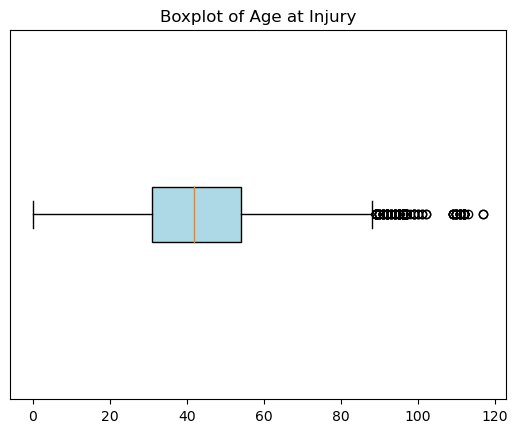

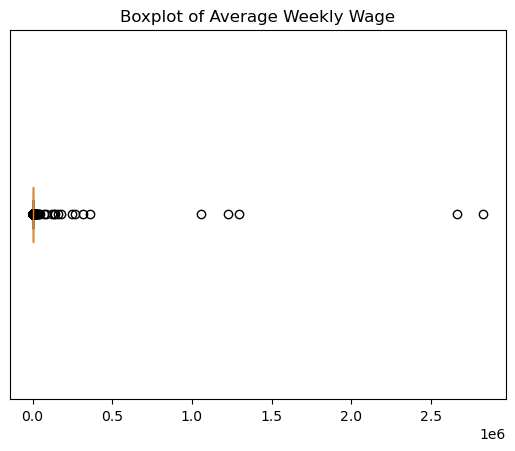

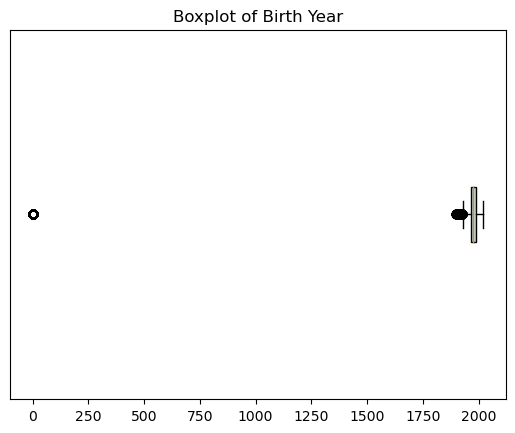

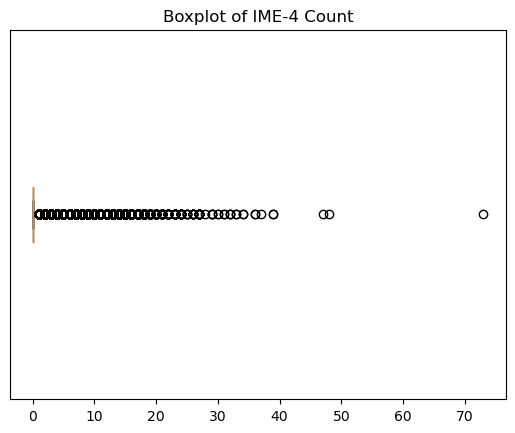

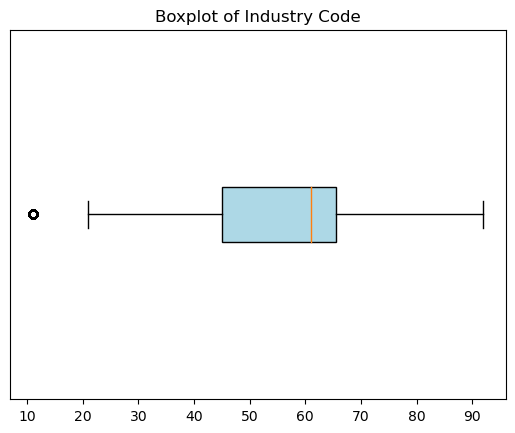

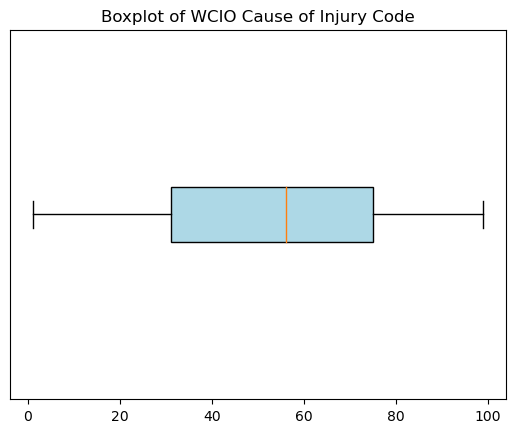

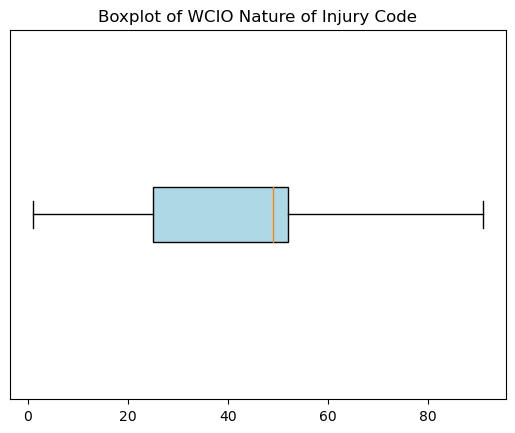

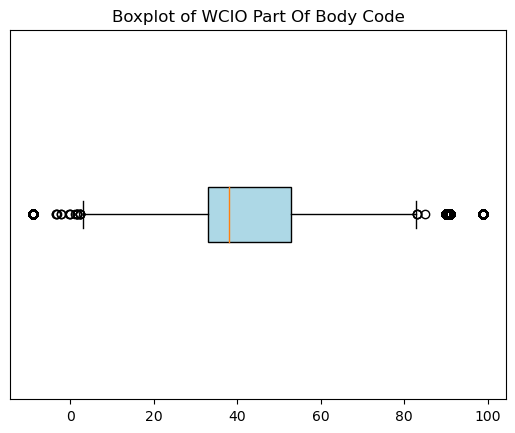

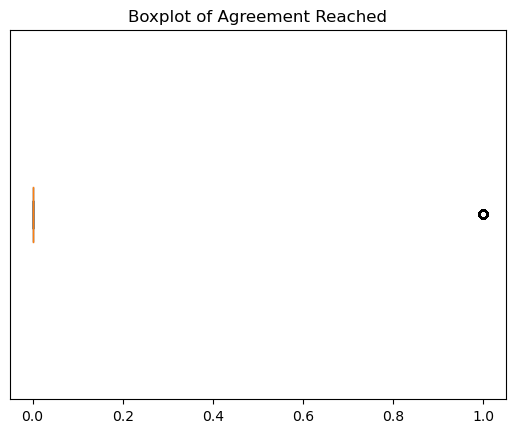

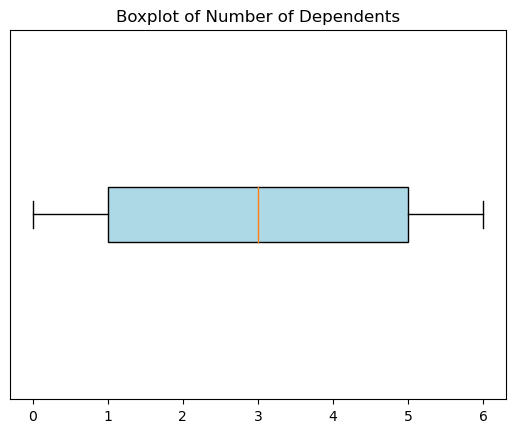

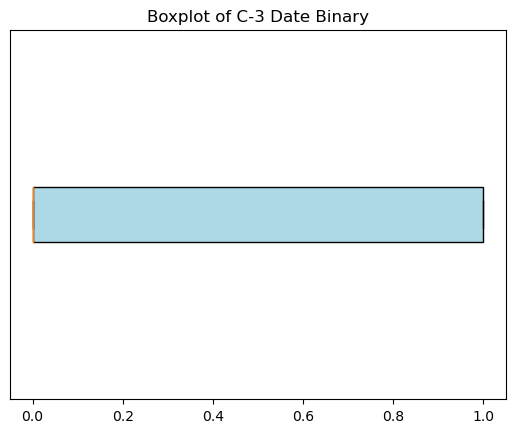

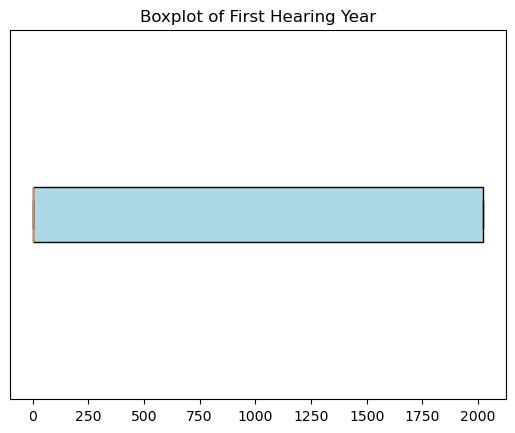

In [7]:
f.boxplots(X_train.loc[:, X_train.columns])

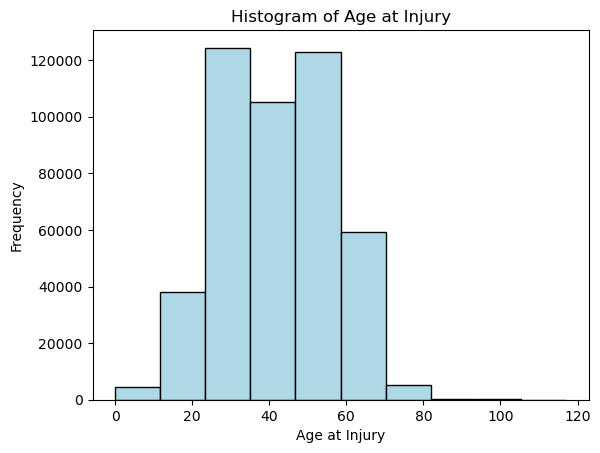

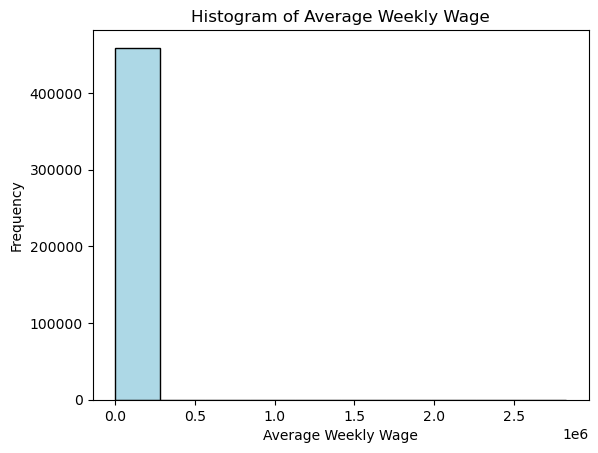

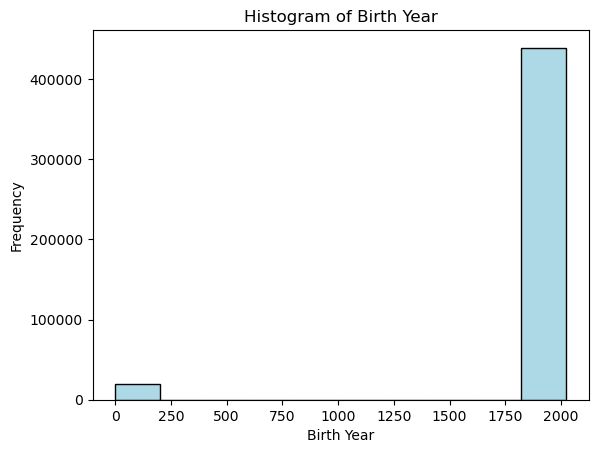

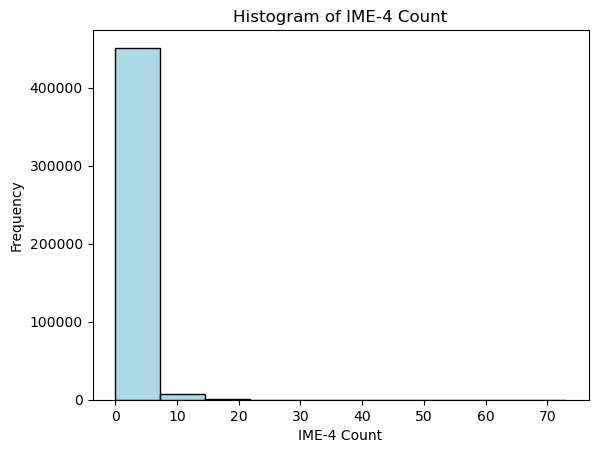

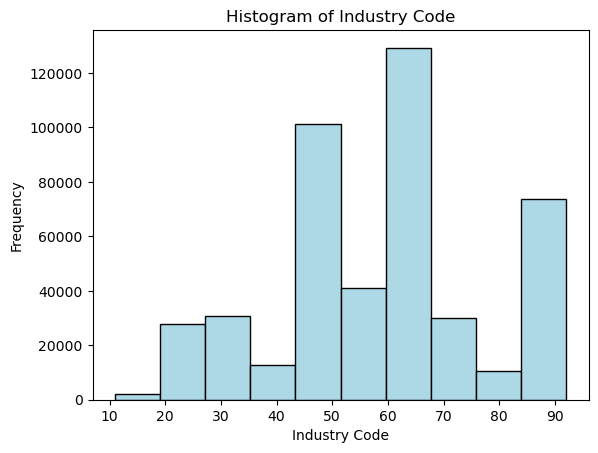

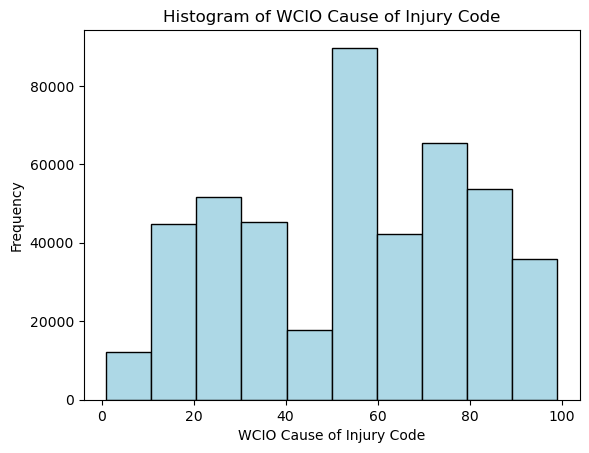

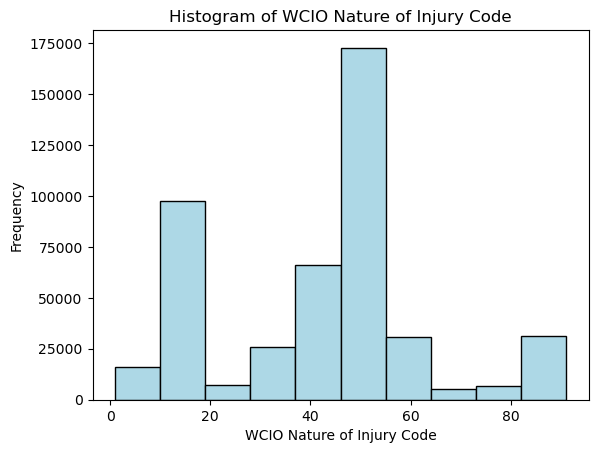

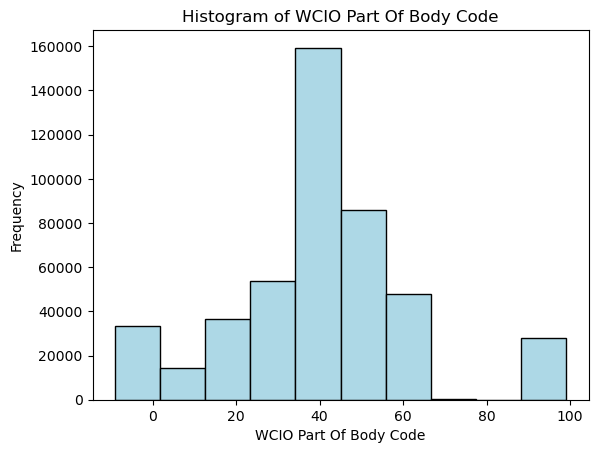

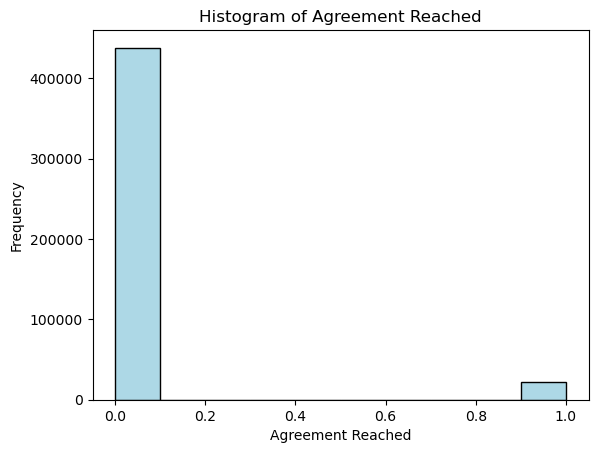

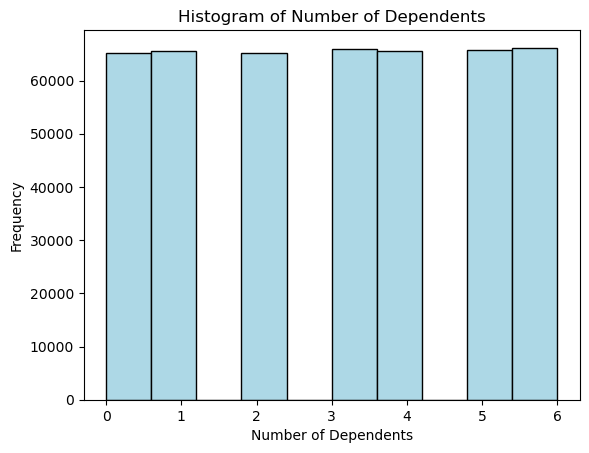

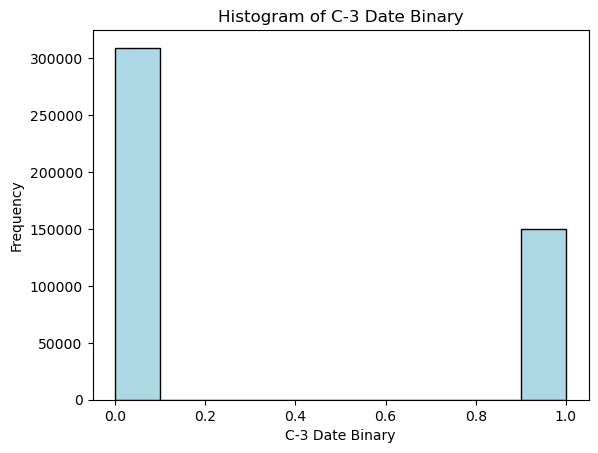

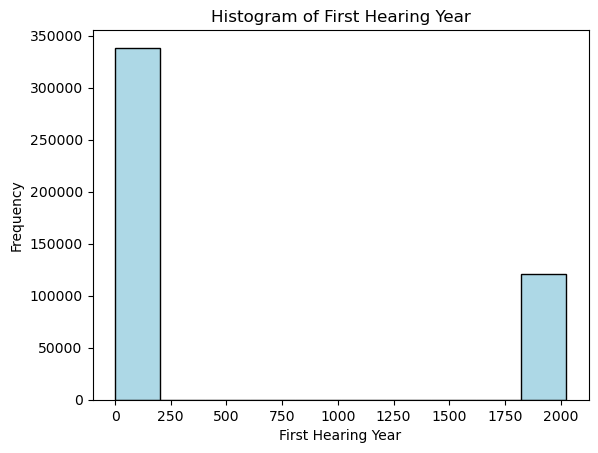

In [8]:
for column in X_train.columns:
        if pd.api.types.is_numeric_dtype(X_train[column]):
            f.plot_histogram(X_train[column], 
                           xlabel=column, 
                           ylabel='Frequency', 
                           title=f'Histogram of {column}', 
                           color='lightblue')

| Method                 | Distribution Assumption | Sensitivity to Outliers | Complexity | Best Used For                 |
|-----------------------|------------------------|-------------------------|------------|-------------------------------|
| IQR                   | None                    | Low                     | Low        | Skewed distributions          |
| Modified Z-Score      | None                    | Moderate                | Moderate   | Small datasets with outliers  |
| Isolation Forest      | None                    | Low                     | High       | High-dimensional data         |


**Interquartile Range**

In [10]:
def detect_outliers_iqr(df):
    outliers_indices = set()
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outlier_data = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        outliers_indices.update(outlier_data.index)
        
        
        # Print the number of outliers
        print(f'Column: {column} - Number of Outliers: {len(outlier_data)}')
        print(f'Column: {column} - % of Outliers: {len(outlier_data) / len(df) * 100}% \n')
        
    return outliers_indices

In [11]:
iqr = detect_outliers_iqr(X_train)
iqr

Column: Age at Injury - Number of Outliers: 167
Column: Age at Injury - % of Outliers: 0.03636601193327817% 

Column: Average Weekly Wage - Number of Outliers: 20212
Column: Average Weekly Wage - % of Outliers: 4.401376246679152% 

Column: Birth Year - Number of Outliers: 20326
Column: Birth Year - % of Outliers: 4.426200949436001% 

Column: IME-4 Count - Number of Outliers: 106183
Column: IME-4 Count - % of Outliers: 23.122468533600454% 

Column: Industry Code - Number of Outliers: 1948
Column: Industry Code - % of Outliers: 0.4241975523714124% 

Column: WCIO Cause of Injury Code - Number of Outliers: 0
Column: WCIO Cause of Injury Code - % of Outliers: 0.0% 

Column: WCIO Nature of Injury Code - Number of Outliers: 0
Column: WCIO Nature of Injury Code - % of Outliers: 0.0% 

Column: WCIO Part Of Body Code - Number of Outliers: 61552
Column: WCIO Part Of Body Code - % of Outliers: 13.403597404294237% 

Column: Agreement Reached - Number of Outliers: 21440
Column: Agreement Reached - %

{5767173,
 5767176,
 5767178,
 5767179,
 5767184,
 5767186,
 5767194,
 5767203,
 5767207,
 5767210,
 5767211,
 5767213,
 5767215,
 5767228,
 5767232,
 5767235,
 5767238,
 5767246,
 5767249,
 5767263,
 5767264,
 5767267,
 5767268,
 5767270,
 5767274,
 5767278,
 5767282,
 5767284,
 5767285,
 5767290,
 5767296,
 5767310,
 5767317,
 5767318,
 5767319,
 5767322,
 5767327,
 5767331,
 5767338,
 5767342,
 5767347,
 5767348,
 5767349,
 5767353,
 5767354,
 5767362,
 5767363,
 5767367,
 5767371,
 5767373,
 5767375,
 5767377,
 5767379,
 5767387,
 5767390,
 5767400,
 5767408,
 5767413,
 5767414,
 5767415,
 5767418,
 5767425,
 5767435,
 5767445,
 5767454,
 5767459,
 5767463,
 5767466,
 5767472,
 5767477,
 5767479,
 5767480,
 5767481,
 5767485,
 5767490,
 5767495,
 5767499,
 5767506,
 5767509,
 5767514,
 5767524,
 5767526,
 5767531,
 5767536,
 5767545,
 5767550,
 5767555,
 5767557,
 5767559,
 5767562,
 5767565,
 5767567,
 5767568,
 5767572,
 5767577,
 5767582,
 5767583,
 5767587,
 5767588,
 5767594,


**Isolation Forest**

In [12]:
from sklearn.ensemble import IsolationForest

def detect_outliers_isolation_forest(df):
    outliers_indices = set()
    
    for column in df.select_dtypes(include=[np.number]).columns:
        # Reshape the data for the model
        data = df[column].values.reshape(-1, 1)
        
        # Fit the Isolation Forest model
        iso_forest = IsolationForest(contamination = 0.01, 
                                     random_state=1)
        outlier_predictions = iso_forest.fit_predict(data)
        
        # Identify outliers (predicted as -1)
        outlier_data = df[outlier_predictions == -1]
        
        outliers_indices.update(outlier_data.index)
        
        # Print the number of outliers
        print(f'Column: {column} - Number of Outliers: {len(outlier_data)}')
        print(f'Column: {column} - % of Outliers: {len(outlier_data) / len(df) * 100:.2f}% \n')

    return outliers_indices

In [13]:
iso = detect_outliers_isolation_forest(X_train)
iso 

Column: Age at Injury - Number of Outliers: 4559
Column: Age at Injury - % of Outliers: 0.99% 

Column: Average Weekly Wage - Number of Outliers: 4523
Column: Average Weekly Wage - % of Outliers: 0.98% 

Column: Birth Year - Number of Outliers: 113
Column: Birth Year - % of Outliers: 0.02% 

Column: IME-4 Count - Number of Outliers: 4221
Column: IME-4 Count - % of Outliers: 0.92% 

Column: Industry Code - Number of Outliers: 2521
Column: Industry Code - % of Outliers: 0.55% 

Column: WCIO Cause of Injury Code - Number of Outliers: 4577
Column: WCIO Cause of Injury Code - % of Outliers: 1.00% 

Column: WCIO Nature of Injury Code - Number of Outliers: 0
Column: WCIO Nature of Injury Code - % of Outliers: 0.00% 

Column: WCIO Part Of Body Code - Number of Outliers: 996
Column: WCIO Part Of Body Code - % of Outliers: 0.22% 

Column: Agreement Reached - Number of Outliers: 0
Column: Agreement Reached - % of Outliers: 0.00% 

Column: Number of Dependents - Number of Outliers: 0
Column: Numbe

{5636103,
 6029321,
 5767179,
 5636108,
 6160399,
 6029329,
 5505043,
 5505045,
 5898262,
 6029340,
 5767203,
 6029350,
 5767210,
 5767212,
 5505084,
 6029373,
 5505086,
 5898301,
 5898313,
 6160459,
 5636172,
 6160463,
 5898320,
 5505116,
 5505117,
 5636190,
 5898342,
 5898352,
 5505156,
 6029463,
 5505185,
 6029479,
 6160552,
 5898409,
 5505193,
 6160564,
 5767353,
 5505214,
 6160575,
 5898431,
 6029504,
 5767362,
 6029507,
 6160582,
 5767367,
 5898451,
 5505243,
 5898461,
 6029537,
 6029543,
 6029547,
 5636337,
 5767413,
 6029562,
 5636351,
 5636354,
 5898501,
 5505291,
 5636369,
 5767445,
 5898519,
 6029599,
 6160673,
 6029611,
 5636397,
 6029621,
 5505340,
 5505347,
 5767495,
 5505352,
 5505360,
 5898577,
 5767506,
 5898594,
 5636452,
 5505389,
 5636463,
 6029683,
 6029687,
 6029694,
 6029717,
 5636503,
 6160791,
 5636505,
 5767587,
 5898661,
 5898665,
 5767594,
 6160810,
 5636530,
 5505460,
 5505470,
 5636550,
 6029776,
 5767638,
 5767667,
 5505532,
 5898754,
 5505538,
 5505556,


In [59]:
common_outliers = iqr.intersection(iso)
print(f'Number of Common Outliers: {len(common_outliers)}')

NameError: name 'iso' is not defined

In [60]:
common = X_train.loc[list(common_outliers)]
common

NameError: name 'common_outliers' is not defined

In [61]:
len(common) / len(X_train) * 100

NameError: name 'common' is not defined

decision - dont do anything for now

## 3.5 Feature Engineering

<a href="#top">Top &#129033;</a>

all transformations must be applied o X_test too

In [62]:
X_train.head(2)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6054143,2022-07-28,49.0,N,2022-08-04,N,405.0,1973.0,2022-08-04,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,DUTCHESS,N,ALBANY,F,0.0,72.0,ACCOMMODATION AND FOOD SERVICES,II,27.0,FROM LIQUID OR GREASE SPILLS,52.0,STRAIN OR TEAR,33.0,LOWER ARM,12590,0.0,Not Work Related,5.0,0,0
5405551,2020-01-06,30.0,N,2020-01-16,N,0.0,1989.0,2020-01-16,MEMIC CASUALTY COMPANY,1A. PRIVATE,ONONDAGA,N,SYRACUSE,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,13204,0.0,Not Work Related,0.0,0,0


**Accident Date**

transform into year (maybe month and day too)

In [63]:
X_train['Accident Year'] = X_train['Accident Date'].dt.year
X_train['Accident Month'] = X_train['Accident Date'].dt.month
X_train['Accident Day'] = X_train['Accident Date'].dt.day

**Alternative Dispute Resolution**

encode ['N' nan 'Y' 'U'] n -> 0, y -> 1, u -> 2

In [64]:
freq = X_train['Alternative Dispute Resolution'].value_counts()
freq

Alternative Dispute Resolution
N    457125
Y      2092
U         3
Name: count, dtype: int64

In [65]:
X_train['Alternative Dispute Resolution Enc'] = X_train['Alternative Dispute Resolution'].map(freq)

**Attorney/Representative**

['N' 'Y' nan] encode 0/1

In [66]:
X_train['Attorney/Representative'].value_counts()

Attorney/Representative
N    313796
Y    145424
Name: count, dtype: int64

In [67]:
X_train['Attorney/Representative Bin'] = X_train['Attorney/Representative'].replace({'N': 0, 'Y': 1})

C:\Users\gonca\AppData\Local\Temp\ipykernel_7592\619412758.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['Attorney/Representative Bin'] = X_train['Attorney/Representative'].replace({'N': 0, 'Y': 1})


**C-2 Date**

transform into year (maybe month and day too)

In [68]:
X_train['C-2 Year'] = X_train['C-2 Date'].dt.year
X_train['C-2 Month'] = X_train['C-2 Date'].dt.month
X_train['C-2 Day'] = X_train['C-2 Date'].dt.day

**Carrier Name**

too many unique values to encode, probably drop

In [69]:
X_train['Carrier Name'].nunique()

2008

frequency encoder

In [70]:
freq = X_train['Carrier Name'].value_counts()

In [71]:
X_train['Carrier Name Enc'] = X_train['Carrier Name'].map(freq)

**Carrier Type**

encode (8 unique values)

In [72]:
freq = X_train['Carrier Type'].value_counts()
freq

Carrier Type
1A. PRIVATE                                    228474
3A. SELF PUBLIC                                 97521
2A. SIF                                         88840
4A. SELF PRIVATE                                42132
UNKNOWN                                          1411
5D. SPECIAL FUND - UNKNOWN                        835
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          5
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         2
Name: count, dtype: int64

In [73]:
X_train['Carrier Type Enc'] = X_train['Carrier Type'].map(freq)

**County of Injury**

probably too many to encode (?) --> freq encoding

In [74]:
X_train['County of Injury'].nunique()

63

In [75]:
freq = X_train['County of Injury'].value_counts()

In [76]:
X_train['County of Injury Enc'] = X_train['County of Injury'].map(freq)

**COVID-19 Indicator**

binary encoding

In [77]:
X_train['COVID-19 Indicator'].value_counts()

COVID-19 Indicator
N    437153
Y     22067
Name: count, dtype: int64

In [78]:
X_train['COVID-19 Indicator Bin'] = X_train['COVID-19 Indicator'].replace({'N': 0, 'Y': 1})

C:\Users\gonca\AppData\Local\Temp\ipykernel_7592\2311287952.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['COVID-19 Indicator Bin'] = X_train['COVID-19 Indicator'].replace({'N': 0, 'Y': 1})


**District Name**

encode (8 uniques)

In [79]:
freq = X_train['District Name'].value_counts()
freq

District Name
NYC           216436
ALBANY         68962
HAUPPAUGE      48363
BUFFALO        36742
SYRACUSE       35677
ROCHESTER      32294
BINGHAMTON     17553
STATEWIDE       3193
Name: count, dtype: int64

In [80]:
X_train['District Name Enc'] = X_train['District Name'].map(freq)

**Gender**

encode ['M' 'F' nan 'U' 'X']

In [81]:
X_train['Gender'].value_counts()

Gender
M    268363
F    187040
U      3780
X        37
Name: count, dtype: int64

In [82]:
X_train['Gender Enc'] = X_train['Gender'].map({
    'M': 0,  # Male
    'F': 1,  # Female
    'U': 2,  # Unknown 
    'X': 2   # Other 
})

**Medical Fee Region**

encode

In [83]:
freq = X_train['Medical Fee Region'].value_counts()
freq

Medical Fee Region
IV     212542
I      108855
II      68073
III     43009
UK      26741
Name: count, dtype: int64

In [84]:
X_train['Medical Fee Region Enc'] = X_train['Medical Fee Region'].map(freq)

**WCB Decision**

always the same - drop

In [85]:
X_train['WCB Decision'].value_counts()

WCB Decision
Not Work Related    459220
Name: count, dtype: int64

In [86]:
X_train = X_train.drop('WCB Decision', axis = 1)

**Claim Injury Type**

In [87]:
# extract first character from y_train and transform it into a number dtype
y_train = y_train.str[0]
y_train = y_train.astype(int)

In [88]:
y_train.unique()

array([4, 2, 5, 3, 1, 6, 8, 7])

**New Variables**

| VARIABLE NAME | DESCRIPTION | 
| -------- | ---------- |
| C-3 Date Binary | 1 if C-3 happened, 0 otherwise |
| First Hearing Year | year of the first hearing (0 if no hearing happened) |
| Accident Year / Month / Day | year / month / day of the accident |
| Assembly Year / Month / Day | year / month / day of the assembly |
| Attorney/Representative Bin | 1 if represented by lawyer, 0 otherwise |
| C-2 Year / Month / Day | year / month / day of receipt of C-2 |
| Carrier Name Enc | replaced Carrier Name by frequency of each carrier name |
| County of Injury Enc | replaced County of Injury by frequency of each county name |
| COVID-19 Indicator Bin | 1 if has covid, 0 otherwise |
| District Name Enc | replaced District Name by frequency of each district name |
| Gender Enc | 0 if male, 1 if female, 2 otherwise |
| Medical Fee Region Enc | replaced Medical Fee Region by frequency of each region name |



## 3.6 Visualisations

<a href="#top">Top &#129033;</a>

In [89]:
all_train = pd.concat([X_train, y_train], axis=1)
all_train.head(2)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents,C-3 Date Binary,First Hearing Year,Accident Year,Accident Month,Accident Day,Alternative Dispute Resolution Enc,Attorney/Representative Bin,C-2 Year,C-2 Month,C-2 Day,Carrier Name Enc,Carrier Type Enc,County of Injury Enc,COVID-19 Indicator Bin,District Name Enc,Gender Enc,Medical Fee Region Enc,Claim Injury Type
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6054143,2022-07-28,49.0,N,2022-08-04,N,405.0,1973.0,2022-08-04,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,DUTCHESS,N,ALBANY,F,0.0,72.0,ACCOMMODATION AND FOOD SERVICES,II,27.0,FROM LIQUID OR GREASE SPILLS,52.0,STRAIN OR TEAR,33.0,LOWER ARM,12590,0.0,5.0,0,0,2022,7,28,457125,0,2022.0,8.0,4.0,6095,228474,9213,0,68962,1,68073,4
5405551,2020-01-06,30.0,N,2020-01-16,N,0.0,1989.0,2020-01-16,MEMIC CASUALTY COMPANY,1A. PRIVATE,ONONDAGA,N,SYRACUSE,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,13204,0.0,0.0,0,0,2020,1,6,457125,0,2020.0,1.0,16.0,1352,228474,12381,0,35677,1,68073,2


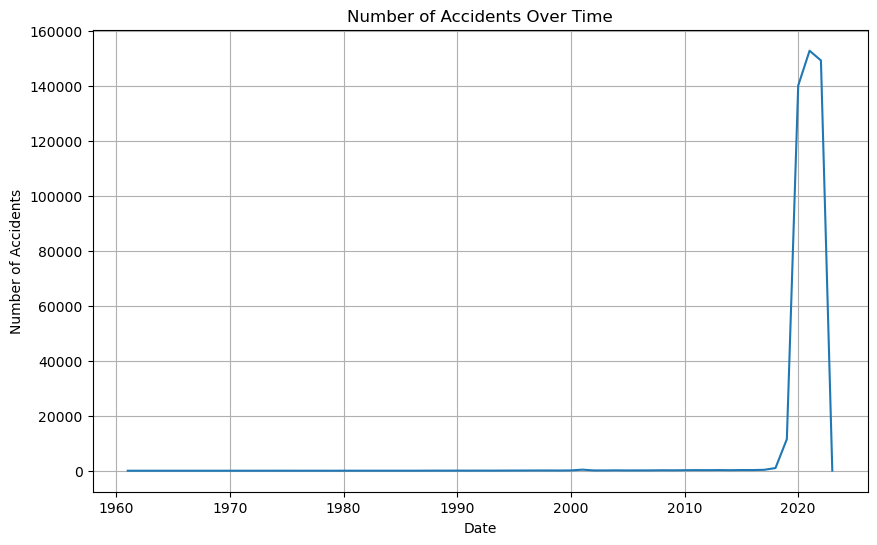

In [90]:
accident_counts = all_train['Accident Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(accident_counts.index, accident_counts.values)
plt.title('Number of Accidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.xticks()
plt.grid(True)
plt.show()

ValueError: Could not interpret value `Assembly Month` for `x`. An entry with this name does not appear in `data`.

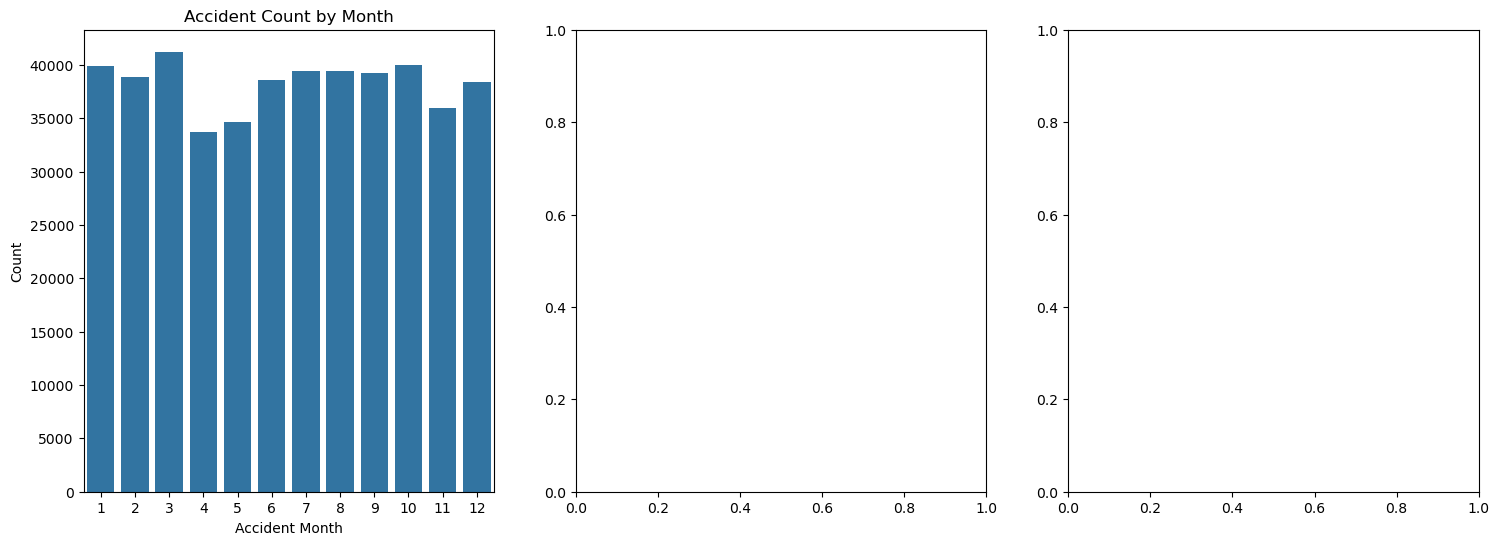

In [91]:
# Set up the figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# First subplot: Accident Month
sns.countplot(data=all_train, x='Accident Month', ax=axes[0])
axes[0].set_title('Accident Count by Month')
axes[0].set_xlabel('Accident Month')
axes[0].set_ylabel('Count')

# Second subplot: Assembly Month
sns.countplot(data=all_train, x='Assembly Month', ax=axes[1])
axes[1].set_title('Assembly Count by Month')
axes[1].set_xlabel('Assembly Month')
axes[1].set_ylabel('Count')

# Third subplot: C-2 Month
sns.countplot(data=all_train, x='C-2 Month', ax=axes[2])
axes[2].set_title('C-2 Count by Month')
axes[2].set_xlabel('C-2 Month')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

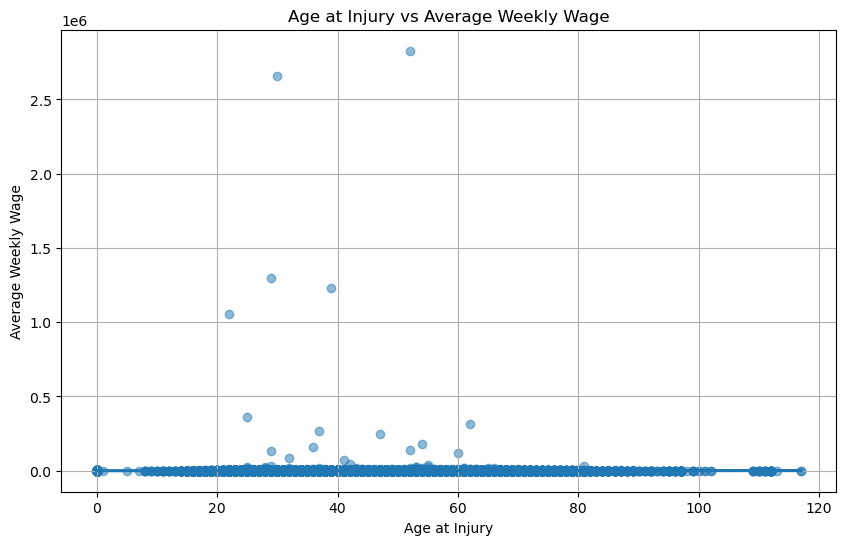

In [92]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Age at Injury', y='Average Weekly Wage', data=all_train, scatter_kws={'alpha':0.5})

# Set the labels and title
plt.title('Age at Injury vs Average Weekly Wage')
plt.xlabel('Age at Injury')
plt.ylabel('Average Weekly Wage')

# Show the plot
plt.grid(True)
plt.show()

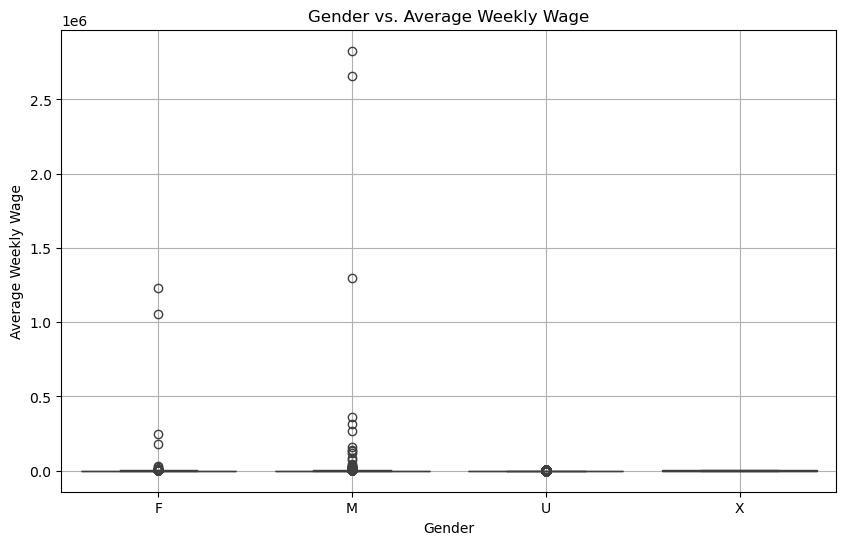

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train, x='Gender', y='Average Weekly Wage')
plt.title('Gender vs. Average Weekly Wage')
plt.xlabel('Gender')
plt.ylabel('Average Weekly Wage')
plt.grid(True)
plt.show()

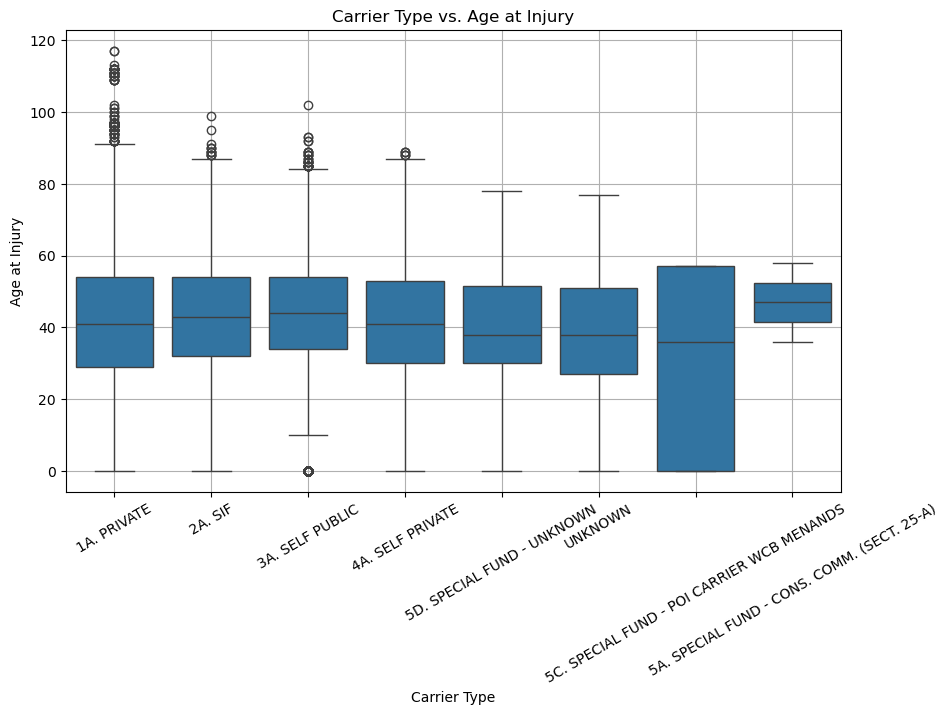

In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train, x='Carrier Type', y='Age at Injury')
plt.title('Carrier Type vs. Age at Injury')
plt.xlabel('Carrier Type')
plt.ylabel('Age at Injury')
plt.xticks(rotation=30) 
plt.grid(True)
plt.show()

In [95]:
num_temp = X_train.select_dtypes(include=[np.number]).columns.tolist()

# Pairwise Relationship of Numerical Variables
sns.set()

# Create pairplot for the selected numerical columns
sns.pairplot(X_train[num_temp], diag_kind="hist")

# Layout adjustments
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

# Display the plot
plt.show()

KeyboardInterrupt: 

In [ ]:
## see distribution of categorical variables
## experiment with density plots
## three way aNOVA

look at X_train and X_test before removing replaced columns

In [82]:
X_train.head(2)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents,C-3 Date Binary,First Hearing Year,County of Injury Enc,COVID-19 Indicator Bin,District Name Enc,Gender Enc,Medical Fee Region Enc
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6054143,2022-07-28,49.0,N,2022-08-04,N,405.0,1973.0,2022-08-04,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,DUTCHESS,N,ALBANY,F,0.0,72.0,ACCOMMODATION AND FOOD SERVICES,II,27.0,FROM LIQUID OR GREASE SPILLS,52.0,STRAIN OR TEAR,33.0,LOWER ARM,12590,0.0,5.0,0,0,9213,0,68962,1,68073
5405551,2020-01-06,30.0,N,2020-01-16,N,0.0,1989.0,2020-01-16,MEMIC CASUALTY COMPANY,1A. PRIVATE,ONONDAGA,N,SYRACUSE,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,13204,0.0,0.0,0,0,12381,0,35677,1,68073


drop variables that will not be needed for modeling purposes

In [83]:
drop = ['Accident Date', 'Alternative Dispute Resolution', 
        'Assembly Date', 'Attorney/Representative', 'C-2 Date',
        'Carrier Name', 'Carrier Type', 'County of Injury', 
        'COVID-19 Indicator', 'District Name', 'Gender',
        'Medical Fee Region']

X_train = X_train.drop(drop, axis = 1)

# 4. Feature Selection

<a href="#top">Top &#129033;</a>

1. split numeric and categorical 
2. evaluate different scalers for numerical (standard, robust, minmax)
- dont forget we have lots of outliers - see which scaler is better for this
3. Filter based methods
- var, spearman corr for numeric
- chi-square for categ
4. Wrapper
- RFE with different models (multinomial logistic reg to start, maybe)
5. Embedded
- lasso
6. explore other methods not talked about in class
7. produce table with results/insights


**EXAMPLE TABLE**

NUM DATA

| VARIABLE | SPEARMAN | RFE MODEL1 | RFE MODEL2 | LASSO | DECISION |
| -------- | -------- | ---------- | ---------- | ----- | -------- |
| var_name | discard | discard | keep | discard | discard |

CATEG DATA

| VARIABLE | CHI-SQUARE | DECISION |
| -------- | ---------- | -------- |
| var_name | keep | keep |

In [162]:
X_train.select_dtypes

<bound method DataFrame.select_dtypes of                  Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
5834430             2021-09-30           38.0                              N   
5444574             2020-02-25           30.0                              N   
5856180             2021-11-08           35.0                              N   
5979713             2022-04-19           31.0                              N   
5920465             2021-12-10           25.0                              N   
...                        ...            ...                            ...   
5541811             2020-08-13           64.0                              N   
5741728             2021-05-27           36.0                              N   
5883653             2021-12-21           33.0                              N   
5570728             2020-09-22           36.0                              N   

**Split Datatypes**

In [163]:
numeric_features = X_train.select_dtypes(include=['float64', 'int64'])
categorical_features = X_train.select_dtypes(include=['object'])

In [164]:
print("\nNumerical Data:")
print(numeric_features.head())


Numerical Data:
                  Age at Injury  Average Weekly Wage  Birth Year  IME-4 Count  \
Claim Identifier                                                                
5834430                    38.0              1435.64      1983.0          NaN   
5444574                    30.0                 0.00      1990.0          NaN   
5856180                    35.0                 0.00      1986.0          NaN   
5979713                    31.0                 0.00      1991.0          2.0   
5920465                    25.0               858.81      1996.0          1.0   

                  Industry Code  OIICS Nature of Injury Description  \
Claim Identifier                                                      
5834430                    92.0                                 NaN   
5444574                    61.0                                 NaN   
5856180                    44.0                                 NaN   
5979713                    48.0                             

In [165]:
print("\nCategorical Data:")
print(categorical_features.head())


Categorical Data:
                 Accident Date Alternative Dispute Resolution Assembly Date  \
Claim Identifier                                                              
5834430             2021-09-30                              N    2021-10-14   
5444574             2020-02-25                              N    2020-03-05   
5856180             2021-11-08                              N    2021-11-12   
5979713             2022-04-19                              N    2022-05-02   
5920465             2021-12-10                              N    2022-02-11   

                 Attorney/Representative    C-2 Date    C-3 Date  \
Claim Identifier                                                   
5834430                                N  2021-10-14         NaN   
5444574                                N  2020-03-05         NaN   
5856180                                N  2021-11-11         NaN   
5979713                                Y  2022-05-19  2022-04-26   
5920465            

**Scaling Numeric Data**

In [166]:
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
X_train_standard_scaled = pd.DataFrame(scaler_standard.fit_transform(numeric_features), columns=numeric_features.columns)

print("Standard Scaled Data Sample:")
print(X_train_standard_scaled.describe())

c:\Users\gonca\anaconda3\envs\DM2425\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\gonca\anaconda3\envs\DM2425\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\gonca\anaconda3\envs\DM2425\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Standard Scaled Data Sample:
       Age at Injury  Average Weekly Wage    Birth Year   IME-4 Count  \
count   4.592200e+05         4.361790e+05  4.361330e+05  1.063540e+05   
mean    2.200970e-16         9.918164e-18 -1.283841e-16 -5.700496e-17   
std     1.000001e+00         1.000001e+00  1.000001e+00  1.000005e+00   
min    -2.954799e+00        -7.317788e-02 -4.549955e+00 -7.777305e-01   
25%    -7.800585e-01        -7.317788e-02  1.887009e-01 -7.777305e-01   
50%    -8.376280e-03        -7.317788e-02  2.176393e-01 -4.248488e-01   
75%     8.334589e-01         5.112608e-02  2.465777e-01  2.809144e-01   
max     5.253094e+00         4.177893e+02  3.165120e-01  2.462975e+01   

       Industry Code  OIICS Nature of Injury Description  \
count   4.511810e+05                                 0.0   
mean   -6.512008e-18                                 NaN   
std     1.000001e+00                                 NaN   
min    -2.425778e+00                                 NaN   
25%    -6.955

In [167]:
from sklearn.preprocessing import RobustScaler

scaler_robust = RobustScaler()
X_train_robust_scaled = pd.DataFrame(scaler_robust.fit_transform(numeric_features), columns=numeric_features.columns)

print("Robust Scaled Data Sample:")
print(X_train_robust_scaled.describe())

Robust Scaled Data Sample:


c:\Users\gonca\anaconda3\envs\DM2425\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
c:\Users\gonca\anaconda3\envs\DM2425\Lib\site-packages\numpy\lib\nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


       Age at Injury  Average Weekly Wage     Birth Year    IME-4 Count  \
count  459220.000000        436179.000000  436133.000000  106354.000000   
mean        0.005191             0.588701      -3.760395       0.401314   
std         0.619765             8.044805      17.278124       0.944608   
min        -1.826087             0.000000     -82.375000      -0.333333   
25%        -0.478261             0.000000      -0.500000      -0.333333   
50%         0.000000             0.000000       0.000000       0.000000   
75%         0.521739             1.000000       0.500000       0.666667   
max         3.260870          3361.618239       1.708333      23.666667   

       Industry Code  OIICS Nature of Injury Description  \
count  451181.000000                                 0.0   
mean       -0.089720                                 NaN   
std         0.755782                                 NaN   
min        -1.923077                                 NaN   
25%        -0.615385    

In [168]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
X_train_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(numeric_features), columns=numeric_features.columns)

print("MinMax Scaled Data Sample:")
print(X_train_minmax_scaled.describe())

MinMax Scaled Data Sample:


c:\Users\gonca\anaconda3\envs\DM2425\Lib\site-packages\sklearn\utils\_array_api.py:695: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
c:\Users\gonca\anaconda3\envs\DM2425\Lib\site-packages\sklearn\utils\_array_api.py:712: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


       Age at Injury  Average Weekly Wage     Birth Year    IME-4 Count  \
count  459220.000000        436179.000000  436133.000000  106354.000000   
mean        0.359995             0.000175       0.934961       0.030610   
std         0.121834             0.002393       0.205488       0.039359   
min         0.000000             0.000000       0.000000       0.000000   
25%         0.264957             0.000000       0.973736       0.000000   
50%         0.358974             0.000000       0.979683       0.013889   
75%         0.461538             0.000297       0.985629       0.041667   
max         1.000000             1.000000       1.000000       1.000000   

       Industry Code  OIICS Nature of Injury Description  \
count  451181.000000                                 0.0   
mean        0.588485                                 NaN   
std         0.242597                                 NaN   
min         0.000000                                 NaN   
25%         0.419753    

### Summary of Scaling Methods for Numerical Data

#### 1. **RobustScaler**
- **Ideal for handling outliers**: The **RobustScaler** is best when working with data that contains outliers, as it scales based on the interquartile range (IQR), making it less sensitive to extreme values.
- **Example**: Features like **'IME-4 Count'** have large outliers that could distort the scaling. **RobustScaler** mitigates this issue.

#### 2. **StandardScaler**
- **Works well for normally distributed data**: The **StandardScaler** standardizes data by centering it with a mean of zero and scaling it by the standard deviation. It is effective when our data is normally distributed.
- **Example**: The feature **'Birth Year'** has a normal distribution and is well-centered using this scaler.

#### 3. **MinMaxScaler**
- **Sensitive to outliers**: The **MinMaxScaler** compresses data into a 0–1 range, but is vulnerable to outliers, which can significantly skew the result. It's most effective when applied to features with moderate ranges or when the model is sensitive to the feature range.
- **Example**: The **'Industry Code'** feature, with a moderate range, benefits from this transformation.

---

### Scaling Results Summary:

| Feature | **RobustScaler** | **StandardScaler** | **MinMaxScaler** |
|---------|------------------|--------------------|------------------|
| **Age at Injury** | Median-based scaling to handle outliers | Scaled to have mean = 0, std = 1 | Values between 0 and 1 |
| **Average Weekly Wage** | Robust to large outliers | Scaled but affected by outliers | Most values compressed due to extreme values |
| **Birth Year** | Handles skew in birth year data | Centered around mean | No major issues |
| **IME-4 Count** | Effective for highly skewed counts | Still influenced by outliers | Compression due to large counts |
| **Industry Code** | Efficient scaling due to moderate range | Normalized for centered values | All values mapped to 0–1 range |

---

### Recommendation:
Given that our dataset contains outliers in variables like **'IME-4 Count'** and **'Average Weekly Wage'**, the **RobustScaler** is the best choice for this scenario, in my opinion. It effectively handles skewed data without the influence of outliers. However, if we require data centering for algorithms that depend on normalized features, we can also consider using the **StandardScaler** after addressing outliers.


**Filter-Based Methods**

**Numerical Data: Variance Threshold**

In [169]:
from sklearn.feature_selection import VarianceThreshold

# Set a variance threshold (0.01)
threshold = 0.01
selector = VarianceThreshold(threshold=threshold)

X_train_high_variance = selector.fit_transform(X_train_standard_scaled)
print(f"Number of features after variance threshold: {X_train_high_variance.shape[1]}")


Number of features after variance threshold: 10


c:\Users\gonca\anaconda3\envs\DM2425\Lib\site-packages\sklearn\feature_selection\_variance_threshold.py:112: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


**Numerical Data: Spearman Correlation**

In [177]:
# Calculate Spearman correlation matrix
correlation_matrix = X_train_standard_scaled.corr(method='spearman')

# Set a correlation threshold, 0.9
correlation_threshold = 0.9

# Find pairs of highly correlated features
high_correlation_pairs = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            high_correlation_pairs.add(colname)

# Drop highly correlated features
X_train_dropped_correlated = X_train_standard_scaled.drop(columns=high_correlation_pairs)
print(f"Features dropped due to high correlation: {high_correlation_pairs}")

Features dropped due to high correlation: set()


**This means no highly correlated features were found using the threshold of 0.9. Since the logic works, we don't need to modify this either, though we could adjust the threshold if needed.**

**Categorical Data: Chi-Square Test**

In [175]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Ensure all categorical features are strings
categorical_features = categorical_features.astype(str)

# Apply LabelEncoder to each categorical column
categorical_features_encoded = categorical_features.apply(LabelEncoder().fit_transform)

# Apply Chi-Square test
chi2_values, p_values = chi2(categorical_features_encoded, y_train)
chi2_results = pd.DataFrame({'Feature': categorical_features.columns, 'Chi2': chi2_values, 'p-value': p_values})

# Filter features with p-values < 0.05 (significant)
chi2_significant = chi2_results[chi2_results['p-value'] < 0.05]
print(f"Significant categorical features based on Chi-Square test: {chi2_significant['Feature'].tolist()}")

Significant categorical features based on Chi-Square test: ['Accident Date', 'Alternative Dispute Resolution', 'Assembly Date', 'Attorney/Representative', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type', 'County of Injury', 'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender', 'Industry Code Description', 'Medical Fee Region', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'Zip Code']


**These are the categorical features that show a significant relationship with the target variable based on the Chi-Square test, with p-values less than 0.05.**

**Wrapper Methods - Recursive Feature Elimination (RFE)**

In [176]:
print(X_train.dtypes)

Accident Date                          object
Age at Injury                         float64
Alternative Dispute Resolution         object
Assembly Date                          object
Attorney/Representative                object
Average Weekly Wage                   float64
Birth Year                            float64
C-2 Date                               object
C-3 Date                               object
Carrier Name                           object
Carrier Type                           object
County of Injury                       object
COVID-19 Indicator                     object
District Name                          object
First Hearing Date                     object
Gender                                 object
IME-4 Count                           float64
Industry Code                         float64
Industry Code Description              object
Medical Fee Region                     object
OIICS Nature of Injury Description    float64
WCIO Cause of Injury Code         

In [ ]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [ ]:
rfe = RFE(estimator = model, n_features_to_select = 3)

In [ ]:
X_rfe = rfe.fit_transform(X = X_train, y = y_train)

In [ ]:
X_train.columns

In [ ]:
rfe.support_

In [ ]:
#dont know optimum number of features
nof_list=np.arange(1,8)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs') #model can be changed as we want
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_val_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_test)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

In [ ]:
#embbeded lasso regression
from sklearn.linear_model import LassoCV
reg = LassoCV()

In [ ]:
reg.fit(X_train, y_train)

In [ ]:
coef = pd.Series(reg.coef_, index = X_train.columns)

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [ ]:
plot_importance(coef,'Lasso')

# 3. Export

<a href="#top">Top &#129033;</a>

In [ ]:
#df.to_csv('./project_data/treated_data')